In [1]:
import numpy as np
np.__version__

'1.19.5'

In [2]:
import pandas as pd
pd.__version__

'1.1.5'

In [3]:
import matplotlib
matplotlib.__version__

'3.3.4'

In [4]:
import matplotlib.pyplot as plt

In [5]:
# Adjust plot size
#options(repr.plot.width=16, repr.plot.height=6)

# For some reason, if this is in the same cell as the import command, it doesn't work.
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [6]:
import scipy
scipy.__version__

'1.5.4'

In [7]:
from scipy import stats

In [8]:
import seaborn as sns

In [9]:
from datetime import datetime

In [10]:
from pandarallel import pandarallel

In [11]:
pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [12]:
default_max_columns=pd.get_option('display.max_columns')

In [13]:
default_max_rows=pd.get_option('display.max_rows')

In [14]:
default_precision=pd.get_option('display.precision')

In [15]:
pd.set_option('display.precision', 2)

In [16]:
default_threshold=np.get_printoptions()['threshold']

In [17]:
np.set_printoptions(threshold=10000000)

# Read meta data

In [18]:
meta = pd.read_csv('20210428-EV/metadata.csv')

In [19]:
meta.head()

,Rand 2 Batch_order,D-plex Sequencing ID,Lexogen Sequencing ID,Diagnosis
0,1_1,SFHH005a,SFHH006a,"GBM, IDH1R132H WT,"
1,1_2,SFHH005b,SFHH006b,"Oligodendroglioma, IDH-mutant, 1p19q codeleted"
2,1_3,SFHH005c,SFHH006c,"GBM, IDH-mutant,"
3,1_4,SFHH005d,SFHH006d,"GBM, IDH-mutant,"
4,1_5,SFHH005e,SFHH006e,"GBM, IDH1R132H WT,"


In [20]:
meta.rename(columns={"Rand 2 Batch_order": "subject"},inplace=True)
meta.rename(columns={"D-plex Sequencing ID": "dplex"},inplace=True)
meta.rename(columns={"Lexogen Sequencing ID": "lexogen"},inplace=True)
meta.rename(columns={"Diagnosis": "diag"},inplace=True)
#meta.set_index('subject',inplace=True)

In [21]:
meta

,subject,dplex,lexogen,diag
0,1_1,SFHH005a,SFHH006a,"GBM, IDH1R132H WT,"
1,1_2,SFHH005b,SFHH006b,"Oligodendroglioma, IDH-mutant, 1p19q codeleted"
2,1_3,SFHH005c,SFHH006c,"GBM, IDH-mutant,"
3,1_4,SFHH005d,SFHH006d,"GBM, IDH-mutant,"
4,1_5,SFHH005e,SFHH006e,"GBM, IDH1R132H WT,"
5,1_6,SFHH005f,SFHH006f,"Diffuse Astrocytoma, IDH-mutant,"
6,1_7,SFHH005g,SFHH006g,"Oligodendroglioma, IDH-mutant, 1p19q codeleted"
7,1_8,SFHH005h,SFHH006h,"GBM, IDH1R132H WT,"
8,1_9,SFHH005i,SFHH006i,"GBM, IDH-mutant,"
9,1_10,SFHH005j,SFHH006j,"Diffuse Astrocytoma, IDH-mutant,"


In [22]:
meta[['disease','idh','x1p19q']] = meta['diag'].str.split(",", 2, expand=True)
#meta.drop('diag',axis='columns',inplace=True)

In [23]:
meta

,subject,dplex,lexogen,diag,disease,idh,x1p19q
0,1_1,SFHH005a,SFHH006a,"GBM, IDH1R132H WT,",GBM,IDH1R132H WT,
1,1_2,SFHH005b,SFHH006b,"Oligodendroglioma, IDH-mutant, 1p19q codeleted",Oligodendroglioma,IDH-mutant,1p19q codeleted
2,1_3,SFHH005c,SFHH006c,"GBM, IDH-mutant,",GBM,IDH-mutant,
3,1_4,SFHH005d,SFHH006d,"GBM, IDH-mutant,",GBM,IDH-mutant,
4,1_5,SFHH005e,SFHH006e,"GBM, IDH1R132H WT,",GBM,IDH1R132H WT,
5,1_6,SFHH005f,SFHH006f,"Diffuse Astrocytoma, IDH-mutant,",Diffuse Astrocytoma,IDH-mutant,
6,1_7,SFHH005g,SFHH006g,"Oligodendroglioma, IDH-mutant, 1p19q codeleted",Oligodendroglioma,IDH-mutant,1p19q codeleted
7,1_8,SFHH005h,SFHH006h,"GBM, IDH1R132H WT,",GBM,IDH1R132H WT,
8,1_9,SFHH005i,SFHH006i,"GBM, IDH-mutant,",GBM,IDH-mutant,
9,1_10,SFHH005j,SFHH006j,"Diffuse Astrocytoma, IDH-mutant,",Diffuse Astrocytoma,IDH-mutant,


# Read raw matrix CORE

In [24]:
#df = pd.read_csv('20210428-EV/dplexonlyreport.csv',index_col=0,header=None)
df = pd.read_csv('20210428-EV/20210513b-report.csv.gz',index_col=0,header=None,low_memory=False)

In [25]:
df.shape

(39, 528)

In [26]:
df.head(12)

,1,2,3,4,5,6,7,8,9,10,...,519,520,521,522,523,524,525,526,527,528
0,,,,,,,,,,,,,,,,,,,,,
,SFHH005aa,SFHH005aa,SFHH005aa,SFHH005aa,SFHH005aa,SFHH005aa,SFHH005ab,SFHH005ab,SFHH005ab,SFHH005ab,...,SFHH006y,SFHH006y,SFHH006y,SFHH006y,SFHH006z,SFHH006z,SFHH006z,SFHH006z,SFHH006z,SFHH006z
---,---,---,---,---,---,---,---,---,---,---,...,---,---,---,---,---,---,---,---,---,---
Subject,3_5,3_5,3_5,3_5,3_5,3_5,3_6,3_6,3_6,3_6,...,3_3,3_3,3_3,3_3,3_4,3_4,3_4,3_4,3_4,3_4
Lab kit,D-plex,D-plex,D-plex,D-plex,D-plex,D-plex,D-plex,D-plex,D-plex,D-plex,...,Lexogen,Lexogen,Lexogen,Lexogen,Lexogen,Lexogen,Lexogen,Lexogen,Lexogen,Lexogen
Trimmer,bbduk1,bbduk2,bbduk3,cutadapt1,cutadapt2,cutadapt3,bbduk1,bbduk2,bbduk3,cutadapt1,...,bbduk3,cutadapt1,cutadapt2,cutadapt3,bbduk1,bbduk2,bbduk3,cutadapt1,cutadapt2,cutadapt3
Raw Read Count,4038879,4038879,4038879,4038879,4038879,4038879,3088240,3088240,3088240,3088240,...,3665258,3665258,3665258,3665258,4868169,4868169,4868169,4868169,4868169,4868169
Raw Read Length,35.0646,35.0646,35.0646,35.0646,35.0646,35.0646,48.6946,48.6946,48.6946,48.6946,...,34.0495,34.0495,34.0495,34.0495,36.2413,36.2413,36.2413,36.2413,36.2413,36.2413
Trimmed Read Count,1270784,1372973,1372997,1395891,1395893,1395893,1240850,1396651,1396740,1418066,...,3633881,3661993,3664115,3664263,4478092,4823895,4823681,4863961,4867158,4867302
Trimmed Ave Read Length,33.8185,38.2306,38.2314,43.5121,43.5142,43.524,40.8779,51.0991,51.101,64.3485,...,32.6867,33.8972,34.0071,34.0507,30.6793,34.7925,34.7983,36.0631,36.1974,36.242


In [27]:
df.drop("---",inplace=True)

In [28]:
df.shape

(38, 528)

In [29]:
df.rename({'  ':'sample'},axis='rows',inplace=True)
df.rename({'Subject':'subject'},axis='rows',inplace=True)
df.rename({'Trimmer':'trimmer'},axis='rows',inplace=True)

In [30]:
df

,1,2,3,4,5,6,7,8,9,10,...,519,520,521,522,523,524,525,526,527,528
0,,,,,,,,,,,,,,,,,,,,,
sample,SFHH005aa,SFHH005aa,SFHH005aa,SFHH005aa,SFHH005aa,SFHH005aa,SFHH005ab,SFHH005ab,SFHH005ab,SFHH005ab,...,SFHH006y,SFHH006y,SFHH006y,SFHH006y,SFHH006z,SFHH006z,SFHH006z,SFHH006z,SFHH006z,SFHH006z
subject,3_5,3_5,3_5,3_5,3_5,3_5,3_6,3_6,3_6,3_6,...,3_3,3_3,3_3,3_3,3_4,3_4,3_4,3_4,3_4,3_4
Lab kit,D-plex,D-plex,D-plex,D-plex,D-plex,D-plex,D-plex,D-plex,D-plex,D-plex,...,Lexogen,Lexogen,Lexogen,Lexogen,Lexogen,Lexogen,Lexogen,Lexogen,Lexogen,Lexogen
trimmer,bbduk1,bbduk2,bbduk3,cutadapt1,cutadapt2,cutadapt3,bbduk1,bbduk2,bbduk3,cutadapt1,...,bbduk3,cutadapt1,cutadapt2,cutadapt3,bbduk1,bbduk2,bbduk3,cutadapt1,cutadapt2,cutadapt3
Raw Read Count,4038879,4038879,4038879,4038879,4038879,4038879,3088240,3088240,3088240,3088240,...,3665258,3665258,3665258,3665258,4868169,4868169,4868169,4868169,4868169,4868169
Raw Read Length,35.0646,35.0646,35.0646,35.0646,35.0646,35.0646,48.6946,48.6946,48.6946,48.6946,...,34.0495,34.0495,34.0495,34.0495,36.2413,36.2413,36.2413,36.2413,36.2413,36.2413
Trimmed Read Count,1270784,1372973,1372997,1395891,1395893,1395893,1240850,1396651,1396740,1418066,...,3633881,3661993,3664115,3664263,4478092,4823895,4823681,4863961,4867158,4867302
Trimmed Ave Read Length,33.8185,38.2306,38.2314,43.5121,43.5142,43.524,40.8779,51.0991,51.101,64.3485,...,32.6867,33.8972,34.0071,34.0507,30.6793,34.7925,34.7983,36.0631,36.1974,36.242
STAR Aligned to Transcriptome,111104,112499,112492,112689,112696,112689,92673,93752,93727,92285,...,337860,337076,336880,336843,362402,363298,363259,362012,361905,361853


In [31]:
df=df.T
df.head()

,sample,subject,Lab kit,trimmer,Raw Read Count,Raw Read Length,Trimmed Read Count,Trimmed Ave Read Length,STAR Aligned to Transcriptome,STAR Aligned to Transcriptome %,...,Bowtie2 Aligned to Salmonella,Bowtie2 Aligned to Salmonella %,Bowtie2 Aligned to masked Salmonella,Bowtie2 Aligned to masked Salmonella %,Bowtie2 Aligned to Burkholderia,Bowtie2 Aligned to Burkholderia %,Bowtie2 Aligned to masked Burkholderia,Bowtie2 Aligned to masked Burkholderia %,Bowtie2 Aligned to mRNA_Prot,Bowtie2 Aligned to mRNA_Prot %
1,SFHH005aa,3_5,D-plex,bbduk1,4038879,35.0646,1270784,33.8185,111104,8.74,...,45946,3.61,14700,1.15,375543,29.55,277406,21.82,58736,4.62
2,SFHH005aa,3_5,D-plex,bbduk2,4038879,35.0646,1372973,38.2306,112499,8.19,...,60133,4.37,17811,1.29,413414,30.11,298416,21.73,71735,5.22
3,SFHH005aa,3_5,D-plex,bbduk3,4038879,35.0646,1372997,38.2314,112492,8.19,...,60133,4.37,17811,1.29,413414,30.11,298416,21.73,71735,5.22
4,SFHH005aa,3_5,D-plex,cutadapt1,4038879,35.0646,1395891,43.5121,112689,8.07,...,61284,4.39,18218,1.30,420290,30.10,304330,21.80,75518,5.41
5,SFHH005aa,3_5,D-plex,cutadapt2,4038879,35.0646,1395893,43.5142,112696,8.07,...,61285,4.39,18218,1.30,420299,30.10,304339,21.80,75522,5.41


In [32]:
#df=df.merge(meta,left_on='Subject',right_on='subject')
df=df.merge(meta,on='subject')
df.head()

,sample,subject,Lab kit,trimmer,Raw Read Count,Raw Read Length,Trimmed Read Count,Trimmed Ave Read Length,STAR Aligned to Transcriptome,STAR Aligned to Transcriptome %,...,Bowtie2 Aligned to masked Burkholderia,Bowtie2 Aligned to masked Burkholderia %,Bowtie2 Aligned to mRNA_Prot,Bowtie2 Aligned to mRNA_Prot %,dplex,lexogen,diag,disease,idh,x1p19q
0,SFHH005aa,3_5,D-plex,bbduk1,4038879,35.0646,1270784,33.8185,111104,8.74,...,277406,21.82,58736,4.62,SFHH005aa,SFHH006aa,"GBM, IDH-mutant,",GBM,IDH-mutant,
1,SFHH005aa,3_5,D-plex,bbduk2,4038879,35.0646,1372973,38.2306,112499,8.19,...,298416,21.73,71735,5.22,SFHH005aa,SFHH006aa,"GBM, IDH-mutant,",GBM,IDH-mutant,
2,SFHH005aa,3_5,D-plex,bbduk3,4038879,35.0646,1372997,38.2314,112492,8.19,...,298416,21.73,71735,5.22,SFHH005aa,SFHH006aa,"GBM, IDH-mutant,",GBM,IDH-mutant,
3,SFHH005aa,3_5,D-plex,cutadapt1,4038879,35.0646,1395891,43.5121,112689,8.07,...,304330,21.80,75518,5.41,SFHH005aa,SFHH006aa,"GBM, IDH-mutant,",GBM,IDH-mutant,
4,SFHH005aa,3_5,D-plex,cutadapt2,4038879,35.0646,1395893,43.5142,112696,8.07,...,304339,21.80,75522,5.41,SFHH005aa,SFHH006aa,"GBM, IDH-mutant,",GBM,IDH-mutant,


#rmsk_family_counts = pd.read_csv('20210428-EV/rmsk_family_counts.csv.gz',index_col=0,header=None,low_memory=False)
rmsk_family_counts = pd.read_csv('20210428-EV/rmsk_family_counts.csv.gz',index_col=0,low_memory=False)
rmsk_family_counts=rmsk_family_counts.T
rmsk_family_counts.columns="rf_"+rmsk_family_counts.columns
rmsk_family_counts=rmsk_family_counts.reset_index()
#rmsk_family_counts[['sample','trimmer','other']]=rmsk_family_counts['rf_sequence'].str.split(".",2,expand=True)
#rmsk_family_counts.drop(["rf_sequence","other"],inplace=True,axis='columns')
rmsk_family_counts[['sample','trimmer','other']]=rmsk_family_counts['index'].str.split(".",2,expand=True)
rmsk_family_counts.drop(["index","other"],inplace=True,axis='columns')
rmsk_family_counts.head()

df=df.merge(rmsk_family_counts,on=['sample','trimmer'])
df.shape

rmsk_class_counts = pd.read_csv('20210428-EV/rmsk_class_counts.csv.gz',index_col=0,low_memory=False)
rmsk_class_counts=rmsk_class_counts.T
rmsk_class_counts.columns="rc_"+rmsk_class_counts.columns
rmsk_class_counts=rmsk_class_counts.reset_index()
rmsk_class_counts[['sample','trimmer','other']]=rmsk_class_counts['index'].str.split(".",2,expand=True)
rmsk_class_counts.drop(["index","other"],inplace=True,axis='columns')
rmsk_class_counts.head()

df=df.merge(rmsk_class_counts,on=['sample','trimmer'])
df.shape

rmsk_name_counts = pd.read_csv('20210428-EV/rmsk_name_counts.csv.gz',index_col=0,low_memory=False)
rmsk_name_counts=rmsk_name_counts.T
rmsk_name_counts.columns="rn_"+rmsk_name_counts.columns
rmsk_name_counts=rmsk_name_counts.reset_index()
rmsk_name_counts[['sample','trimmer','other']]=rmsk_name_counts['index'].str.split(".",2,expand=True)
rmsk_name_counts.drop(["index","other"],inplace=True,axis='columns')
rmsk_name_counts.head()

df=df.merge(rmsk_name_counts,on=['sample','trimmer'])
df.shape

In [33]:
gene_counts = pd.read_csv('20210428-EV/gene_counts.csv.gz',index_col=0,low_memory=False)
gene_counts=gene_counts.T
#gene_counts.columns="rf_"+gene_counts.columns
gene_counts=gene_counts.reset_index()
gene_counts[['sample','trimmer','other']]=gene_counts['index'].str.split(".",2,expand=True)
gene_counts.drop(["index","other"],inplace=True,axis='columns')
gene_counts.head()

sequence,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,sample,trimmer
0,0,0,0,0,0,0,0,26,0,0,...,0,0,0,0,0,0,78,0,SFHH005aa,bbduk1
1,0,0,0,0,0,0,0,26,0,0,...,0,0,0,0,0,0,78,0,SFHH005aa,bbduk2
2,0,0,0,0,0,0,0,26,0,0,...,0,0,0,0,0,0,78,0,SFHH005aa,bbduk3
3,0,0,0,0,0,0,0,26,0,0,...,0,0,0,0,0,0,72,0,SFHH005aa,cutadapt1
4,0,0,0,0,0,0,0,26,0,0,...,0,0,0,0,0,0,72,0,SFHH005aa,cutadapt2


In [34]:
df=df.merge(gene_counts,on=['sample','trimmer'])
df.shape

(528, 34118)

mirna_counts = pd.read_csv('20210428-EV/mirna_counts.csv.gz',index_col=0,low_memory=False)
mirna_counts=mirna_counts.T
#mirna_counts.columns="rf_"+mirna_counts.columns
mirna_counts=mirna_counts.reset_index()
mirna_counts[['sample','trimmer','other']]=mirna_counts['index'].str.split(".",2,expand=True)
mirna_counts.drop(["index","other"],inplace=True,axis='columns')
mirna_counts.head()

df=df.merge(mirna_counts,on=['sample','trimmer'])
df.shape

mrna_counts = pd.read_csv('20210428-EV/mrna_counts.csv.gz',index_col=0,low_memory=False)
mrna_counts=mrna_counts.T
#mrna_counts.columns="rf_"+mrna_counts.columns
mrna_counts=mrna_counts.reset_index()
mrna_counts[['sample','trimmer','other']]=mrna_counts['index'].str.split(".",2,expand=True)
mrna_counts.drop(["index","other"],inplace=True,axis='columns')
mrna_counts.head()

df=df.merge(mrna_counts,on=['sample','trimmer'])
df.shape

(2400, 167817)


In [35]:
df.head()

,sample,subject,Lab kit,trimmer,Raw Read Count,Raw Read Length,Trimmed Read Count,Trimmed Ave Read Length,STAR Aligned to Transcriptome,STAR Aligned to Transcriptome %,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,SFHH005aa,3_5,D-plex,bbduk1,4038879,35.0646,1270784,33.8185,111104,8.74,...,0,0,0,0,0,0,0,0,78,0
1,SFHH005aa,3_5,D-plex,bbduk2,4038879,35.0646,1372973,38.2306,112499,8.19,...,0,0,0,0,0,0,0,0,78,0
2,SFHH005aa,3_5,D-plex,bbduk3,4038879,35.0646,1372997,38.2314,112492,8.19,...,0,0,0,0,0,0,0,0,78,0
3,SFHH005aa,3_5,D-plex,cutadapt1,4038879,35.0646,1395891,43.5121,112689,8.07,...,0,0,0,0,0,0,0,0,72,0
4,SFHH005aa,3_5,D-plex,cutadapt2,4038879,35.0646,1395893,43.5142,112696,8.07,...,0,0,0,0,0,0,0,0,72,0


In [36]:
df.columns  #.tolist()

Index(['sample', 'subject', 'Lab kit', 'trimmer', 'Raw Read Count',
       'Raw Read Length', 'Trimmed Read Count', 'Trimmed Ave Read Length',
       'STAR Aligned to Transcriptome', 'STAR Aligned to Transcriptome %',
       ...
       'ZWILCH', 'ZWINT', 'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX',
       'ZZEF1', 'ZZZ3'],
      dtype='object', length=34118)

In [37]:
#df.columns.tolist().index('bowtie2 mRNA Counts')

#mrnas=df.columns[41:91]
#mrnas=df.columns[37:99]
#a=df.columns.tolist().index('bowtie2 mRNA Counts')+1
#b=df.columns.tolist().index('STAR Gene Counts')
#mrnas=df.columns[a:b]
mrnas=mrna_counts.columns[:-2]
mrnas

In [38]:
#df.columns.tolist().index('STAR Gene Counts')

In [39]:
#genes=df.columns[92:142]
#genes=df.columns[100:554]
#a=df.columns.tolist().index('STAR Gene Counts')+1
#b=df.columns.tolist().index('STAR miRNA Counts')
#genes=df.columns[a:b]
genes=gene_counts.columns[:-2]
genes

Index(['A1BG', 'A1BG-AS1', 'A1CF', 'A2M', 'A2M-AS1', 'A2ML1', 'A2MP1',
       'A3GALT2', 'A4GALT', 'A4GNT',
       ...
       'ZWILCH', 'ZWINT', 'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX',
       'ZZEF1', 'ZZZ3'],
      dtype='object', name='sequence', length=34074)

In [40]:
#df.columns.tolist().index('STAR miRNA Counts')

#mirnas=df.columns[143:193]
#mirnas=df.columns[555:1139]
#a=df.columns.tolist().index('STAR miRNA Counts')+1
#b=df.columns.tolist().index('rmsk Family Counts')
##b=df.columns.tolist().index('diamond Family Counts')
#mirnas=df.columns[a:b]
mirnas=mirna_counts.columns[:-2]
mirnas

In [41]:
#df.columns.tolist().index('diamond Family Counts')

#diamond_families=df.columns[194:244]
#a=df.columns.tolist().index('diamond Family Counts')+1
#b=df.columns.tolist().index('rmsk Family Counts')
#diamond_families=df.columns[a:b]

diamond_families=[]
#diamond_families=diamond_family_counts.columns[:-2]
diamond_families

In [42]:
#df.columns.tolist().index('rmsk Family Counts')

#rmsk_families=df.columns[245:295]
#rmsk_families=df.columns[1140:1196]
#a=df.columns.tolist().index('rmsk Family Counts')+1
#b=df.columns.tolist().index('rmsk Class Counts')
#rmsk_families=df.columns[a:b]
rmsk_families=rmsk_family_counts.columns[:-2]
rmsk_families

In [43]:
#df.columns.tolist().index('rmsk Class Counts')

#rmsk_classes=df.columns[296:312]
#rmsk_classes=df.columns[1197:1213]
#a=df.columns.tolist().index('rmsk Class Counts')+1
#b=df.columns.tolist().index('rmsk Name Counts')
#rmsk_classes=df.columns[a:b]
rmsk_classes=rmsk_class_counts.columns[:-2]
rmsk_classes

In [44]:
#df.columns.tolist().index('rmsk Name Counts')

#rmsk_names=df.columns[313:363]
#rmsk_names=df.columns[1214:1699]
#a=df.columns.tolist().index('rmsk Name Counts')+1
#b=df.columns.tolist().index('subject')
#rmsk_names=df.columns[a:b]
rmsk_names=rmsk_name_counts.columns[:-2]
rmsk_names

In [45]:
#df.columns.tolist().index('subject')

In [46]:
df['Raw Read Count'] = pd.to_numeric(df['Raw Read Count'], errors='coerce')

In [47]:
df['Trimmed Read Count'] = pd.to_numeric(df['Trimmed Read Count'], errors='coerce')

In [48]:
pd.set_option('display.max_rows',None)

In [49]:
#df[['subject','sample','Raw Read Count']].drop_duplicates().sort_values(by='Raw Read Count')

In [50]:
#df[['subject','sample','trimmer','Trimmed Read Count']].drop_duplicates().sort_values(by='Trimmed Read Count')

In [51]:
pd.set_option('display.max_rows',default_max_rows)

# Prepping to ttest all items against all other items

In [52]:
df['diag'].unique()

array(['GBM, IDH-mutant,', 'Diffuse Astrocytoma, IDH-mutant,',
       'Oligodendroglioma, IDH-mutant, 1p19q codeleted',
       'V01 control (S1),,', 'GBM, IDH1R132H WT,', 'blank 2 (C1),,',
       'blank1 (C1),,'], dtype=object)

In [53]:
u=df['diag'].unique()
diags=u[0:3]
diags=np.append(diags,u[4])

In [54]:
diags

array(['GBM, IDH-mutant,', 'Diffuse Astrocytoma, IDH-mutant,',
       'Oligodendroglioma, IDH-mutant, 1p19q codeleted',
       'GBM, IDH1R132H WT,'], dtype=object)

In [55]:
type(diags)

numpy.ndarray

In [56]:
diags=diags.tolist()

In [57]:
diags

['GBM, IDH-mutant,',
 'Diffuse Astrocytoma, IDH-mutant,',
 'Oligodendroglioma, IDH-mutant, 1p19q codeleted',
 'GBM, IDH1R132H WT,']

In [58]:
# Why was this here?

#import warnings
#warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

pca plots

In [59]:
def ttests_boxplots_and_heatmaps(localdf,columns,box_p=0.01,heat_p=0.15):
    select_p_values=[]
    for col in columns:

        if ( col not in localdf.columns ):
            continue

        for labkit in localdf['Lab kit'].unique():
            #"D-plex","Lexogen":
            for trimmer in 'bbduk2','cutadapt2':
                #localdf['Trimmer'].unique():
                #"bbduk1","bbduk2","bbduk3","cutadapt1","cutadapt2","cutadapt3":
                for diag in diags:
                    others=diags.copy()
                    others.remove(diag)
                    for other in others:
                        t, p = stats.ttest_ind(
                            localdf[((localdf["Lab kit"]==labkit) &
                                     (localdf["trimmer"]==trimmer) & 
                                (localdf["diag"]==diag))][col],
                            localdf[((localdf["Lab kit"]==labkit) &
                                     (localdf["trimmer"]==trimmer) & 
                                (localdf["diag"]==other))][col])
                        if p < heat_p:
                            select_p_values.append([abs(t),p,col,labkit,trimmer])

    pdf = pd.DataFrame(select_p_values, columns=['t','p','col','labkit','trimmer'])                        
    pdf=pdf.drop_duplicates().sort_values('p')

    for index, row in pdf.iterrows():
        if row['p'] < box_p:
            print(" p : "+str(row['p'])+"  ( t : "+str(row['t'])+" ) :  "+
                  row['labkit']+"  :  "+row['trimmer']+"  :  "+row['col'])
            print("Control and blanks")
            print(localdf[
                (localdf['diag']=='V01 control (S1),,') &
                (localdf["Lab kit"]==row['labkit']) &
                (localdf["trimmer"]==row['trimmer'])][row['col']])
            print(localdf[
                (localdf['diag']=='blank 2 (C1),,') &
                (localdf["Lab kit"]==row['labkit']) &
                (localdf["trimmer"]==row['trimmer'])][row['col']])
            print(localdf[
                (localdf['diag']=='blank1 (C1),,') &
                (localdf["Lab kit"]==row['labkit']) &
                (localdf["trimmer"]==row['trimmer'])][row['col']])
                        
            localdf[((localdf["Lab kit"]==row['labkit']) &
                     (localdf["trimmer"]==row['trimmer']))].boxplot(
                column=row['col'],by=['diag'])
            plt.title(row['col'] + " Normalized by Trimmed Read Count")
            plt.xticks(rotation=75,ha='right')
            plt.show()

    selected=['subject','sample','Lab kit','trimmer','diag','idh']
    selected=np.append(selected,pdf['col'])
    selected=np.unique(selected)

    #['Lab kit' 'NR_029609.1' 'trimmer' 'diag' 'idh' 'sample' 'subject']
    if len(selected) > 7:
        for trimmer in 'bbduk2','cutadapt2':
            for labkit in dfn['Lab kit'].unique():
                tmp=localdf[selected].copy()
                tmp=tmp[(tmp['trimmer']==trimmer) & (tmp['Lab kit']==labkit)]
                tmp=tmp.drop('trimmer',axis='columns')
                tmp=tmp.drop('Lab kit',axis='columns')
                tmp.set_index(['subject','sample','diag','idh'],inplace=True)
                
                #tmp-=tmp.min() # This may almost always be 0 now.
                tmp/=tmp.max() # given that there should be no NAs now, coule let clustermap do this
                # ...
                #standard_scale int or None, optional
                #Either 0 (rows) or 1 (columns).
                #Whether or not to standardize that dimension, meaning for each row or column,
                #subtract the minimum and divide each by its maximum.
                # how would that deal with 0s or empty cells

                tmp=tmp.fillna(0) # Somehow, some scaled values become NaN so keep this
                
                tmp.reset_index(inplace=True)

                #tmp1=tmp.sort_values(['diag']).T
                tmp=tmp.sort_values(['idh','diag'])
                #print(tmp.head())
                tmp.drop(['subject'],inplace=True,axis='columns')
                tmp.set_index(['sample','idh'],inplace=True)
                
                diagnoses=tmp.pop('diag')
                #lut = dict(zip(diagnoses.unique(), "rgbcmykb"))
                #col_colors = diagnoses.map(lut)
                #print(col_colors)
                #print(tmp.columns)
                
                tmp=tmp.T

                #print('pal')
                network_pal = sns.cubehelix_palette(len(diagnoses.unique()),
                                    light=.9, dark=.1, reverse=True,
                                    start=1, rot=-2)
                #print(network_pal)
                network_pal
                #print('lut')
                network_lut = dict(zip(diagnoses.unique(), network_pal))
                #print(network_lut)
                #print('labels')
                # Convert the palette to vectors that will be drawn on the side of the matrix
                network_labels = diagnoses
                #print(network_labels)
                network_colors = pd.Series(network_labels, index=tmp.columns).map(network_lut)                
                #print('colors')
                #print(network_colors)
                
                # from http://dawnmy.github.io/2016/10/24/Plot-heatmaap-with-side-color-indicating-the-class-of-variables/
                # Create a custom palette to identify the networks
                #network_pal = sns.cubehelix_palette(len(used_networks),
                #                    light=.9, dark=.1, reverse=True,
                #                    start=1, rot=-2)
                #network_lut = dict(zip(map(str, used_networks), network_pal))

                # Convert the palette to vectors that will be drawn on the side of the matrix
                #network_labels = df.columns.get_level_values("network")
                #network_colors = pd.Series(network_labels, index=df.columns).map(network_lut)                
   
                # Create a custom colormap for the heatmap values
                #cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)

                # Draw the full plot
                #g = sns.clustermap(df.corr(),

                #                 # Turn off the clustering
                #                 row_cluster=False, col_cluster=False,

                #                  # Add colored class labels
                #                  row_colors=network_colors, col_colors=network_colors,

                #                  # Make the plot look better when many rows/cols
                #                  linewidths=0, xticklabels=False, yticklabels=False)

                # Draw the legend bar for the classes                 
                #for label in network_labels.unique():
                #    g.ax_col_dendrogram.bar(0, 0, color=network_lut[label],
                #                            label=label, linewidth=0)
                #g.ax_col_dendrogram.legend(loc="center", ncol=5)

                
                g=sns.clustermap(tmp,col_cluster=False,figsize=(15,20),cmap="Spectral",col_colors=network_colors)
                g.fig.suptitle("Clustermap 1 : "+trimmer+" "+labkit)
                plt.setp(g.ax_heatmap.get_xticklabels(), rotation=75, horizontalalignment='right')

                # Draw the legend bar for the classes                 
                for label in network_labels.unique():
                    g.ax_col_dendrogram.bar(0, 0, color=network_lut[label],
                                            label=label, linewidth=0)
                g.ax_col_dendrogram.legend(loc="center", ncol=4)
                
                # Adjust the postion of the main colorbar for the heatmap
                #g.cax.set_position([.97, .2, .03, .45])
                g.cax.set_position([0, .15, .005, .65])
                plt.show()

                g=sns.clustermap(tmp,figsize=(15,20),cmap="Spectral",col_colors=network_colors)
                g.fig.suptitle("Clustermap 2 : "+trimmer+" "+labkit)
                plt.setp(g.ax_heatmap.get_xticklabels(), rotation=75, horizontalalignment='right')

                # Draw the legend bar for the classes                 
                for label in network_labels.unique():
                    g.ax_col_dendrogram.bar(0, 0, color=network_lut[label],
                                            label=label, linewidth=0)
                g.ax_col_dendrogram.legend(loc="center", ncol=4)
                                
                # Adjust the postion of the main colorbar for the heatmap
                # [dist from left,dist from bottom?,width?,height?]
                g.cax.set_position([0, .15, .005, .65])
                plt.show()  
    else:
        print("Not enough data to produce cluster maps")

# Normalize by Trimmed Read Count

In [60]:
dfn=df.copy()

In [61]:
dfn.head()

,sample,subject,Lab kit,trimmer,Raw Read Count,Raw Read Length,Trimmed Read Count,Trimmed Ave Read Length,STAR Aligned to Transcriptome,STAR Aligned to Transcriptome %,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,SFHH005aa,3_5,D-plex,bbduk1,4038879,35.0646,1270784,33.8185,111104,8.74,...,0,0,0,0,0,0,0,0,78,0
1,SFHH005aa,3_5,D-plex,bbduk2,4038879,35.0646,1372973,38.2306,112499,8.19,...,0,0,0,0,0,0,0,0,78,0
2,SFHH005aa,3_5,D-plex,bbduk3,4038879,35.0646,1372997,38.2314,112492,8.19,...,0,0,0,0,0,0,0,0,78,0
3,SFHH005aa,3_5,D-plex,cutadapt1,4038879,35.0646,1395891,43.5121,112689,8.07,...,0,0,0,0,0,0,0,0,72,0
4,SFHH005aa,3_5,D-plex,cutadapt2,4038879,35.0646,1395893,43.5142,112696,8.07,...,0,0,0,0,0,0,0,0,72,0


def normalize(row,cols):
    #return math.sin(x.a**2) + math.sin(x.b**2)
    return 1e9*row[cols]/row['Trimmed Read Count']

def vector_normalize(row,cols):
    #return math.sin(x.a**2) + math.sin(x.b**2)
    return 1e9*row[cols].values/row['Trimmed Read Count']

In [62]:
datetime.now().strftime("%H:%M:%S")

'08:29:48'

dfn[rmsk_classes]=(1e9*dfn[rmsk_classes].values)/dfn[['Trimmed Read Count']].values
#dfn[rmsk_classes]=np.divide((1e9*dfn[rmsk_classes].values),dfn[['Trimmed Read Count']].values)

#dfn[rmsk_classes]=dfn[rmsk_classes].divide(dfn['Trimmed Read Count'], axis="index")*1e9
#dfn[rmsk_classes]=dfn.parallel_apply(vector_normalize,args=(rmsk_classes,),axis='columns')
#dfn[rmsk_classes]=dfn.parallel_apply(normalize,args=(rmsk_classes,),axis='columns')
#    lambda row: 1e9*row[rmsk_classes]/row['Trimmed Read Count'], axis='columns' )


In [63]:
#np.divide((1e9*dfn[rmsk_classes].values),dfn[['Trimmed Read Count']].values)

In [64]:
#1e9*dfn[rmsk_classes].head().values

In [65]:
#dfn[rmsk_classes]=dfn[rmsk_classes].divide(dfn['Trimmed Read Count'], axis="index")*1e9
#dfn[rmsk_classes]=np.divide((1e9*dfn[rmsk_classes].values),dfn[['Trimmed Read Count']].values)

In [66]:
#dfn[rmsk_classes].values

In [67]:
#dfn[['Trimmed Read Count']].shape

In [68]:
#dfn['Trimmed Read Count'].head().to_numpy()

In [69]:
#dfn[rmsk_classes].head()

In [70]:
datetime.now().strftime("%H:%M:%S")

'08:29:48'

dfn[rmsk_families]=(1e9*dfn[rmsk_families].values)/dfn[['Trimmed Read Count']].values
#dfn[rmsk_families]=dfn[rmsk_families].divide(dfn['Trimmed Read Count'], axis="index")*1e9
#dfn[rmsk_families]=dfn.parallel_apply(normalize,args=(rmsk_families,),axis='columns')
#    lambda row: 1e9*row[rmsk_families]/row['Trimmed Read Count'], axis='columns' )


In [71]:
datetime.now().strftime("%H:%M:%S")

'08:29:48'

dfn[rmsk_names]=(1e9*dfn[rmsk_names].values)/dfn[['Trimmed Read Count']].values
#dfn[rmsk_names]=dfn.parallel_apply(normalize,args=(rmsk_names,),axis='columns')
#    lambda row: 1e9*row[rmsk_names/row['Trimmed Read Count'], axis='columns' )


In [72]:
datetime.now().strftime("%H:%M:%S")

'08:29:48'

dfn[mirnas]=(1e9*dfn[mirnas].values)/dfn[['Trimmed Read Count']].values
#dfn[mirnas]=dfn.parallel_apply(normalize,args=(mirnas,),axis='columns')
#    lambda row: 1e9*row[mirnas]/row['Trimmed Read Count'], axis='columns' )

In [73]:
datetime.now().strftime("%H:%M:%S")

'08:29:48'

In [74]:
dfn[genes]=(1e9*dfn[genes].values)/dfn[['Trimmed Read Count']].values
#dfn[genes]=dfn.parallel_apply(normalize,args=(genes,),axis='columns')
#    lambda row: 1e9*row[genes]/row['Trimmed Read Count'], axis='columns' )

In [75]:
datetime.now().strftime("%H:%M:%S")

'08:45:27'

dfn[mrnas]=(1e9*dfn[mrnas].values)/dfn[['Trimmed Read Count']].values
#dfn[mrnas]=dfn.parallel_apply(normalize,args=(mrnas,),axis='columns')
#    lambda row: 1e9*row[mrnas]/row['Trimmed Read Count'], axis='columns' )

In [76]:
datetime.now().strftime("%H:%M:%S")

'08:45:27'

In [77]:
#dfn[diamond_families]=dfn.parallel_apply(normalize,args=(diamond_families,),axis='columns')
#    lambda row: 1e9*row[diamond_families]/row['Trimmed Read Count'], axis='columns' )

In [78]:
datetime.now().strftime("%H:%M:%S")

'08:45:27'

In [79]:
#a=dfn.columns.tolist().index('x1p19q')+1
#a

In [80]:
#cols=dfn.columns[a:]
#cols

In [81]:
dfn.head()

,sample,subject,Lab kit,trimmer,Raw Read Count,Raw Read Length,Trimmed Read Count,Trimmed Ave Read Length,STAR Aligned to Transcriptome,STAR Aligned to Transcriptome %,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,SFHH005aa,3_5,D-plex,bbduk1,4038879,35.0646,1270784,33.8185,111104,8.74,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61379.43,0.0
1,SFHH005aa,3_5,D-plex,bbduk2,4038879,35.0646,1372973,38.2306,112499,8.19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56811.02,0.0
2,SFHH005aa,3_5,D-plex,bbduk3,4038879,35.0646,1372997,38.2314,112492,8.19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56810.03,0.0
3,SFHH005aa,3_5,D-plex,cutadapt1,4038879,35.0646,1395891,43.5121,112689,8.07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51579.96,0.0
4,SFHH005aa,3_5,D-plex,cutadapt2,4038879,35.0646,1395893,43.5142,112696,8.07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51579.88,0.0


In [82]:
datetime.now().strftime("%H:%M:%S")

'08:45:27'

In [83]:
for c in ['CDKN2A','CDKN2A-DT','CDKN2AIP','CDKN2AIPNL','CDKN2B','CDKN2B-AS1',
    'EGFR','EGFR-AS1','IDH1','IDH1-AS1','IDH2','IDH2-DT','NF1','NOTCH1',
    'RB1','RB1CC1','RB1-DT','TERT','TP53']:
        if( c not in dfn.columns ):
            print("Missing "+c) 

In [84]:
datetime.now().strftime("%H:%M:%S")

'08:45:27'

# Select Genes

 p : 0.04520587862677298  ( t : 2.15213364120796 ) :  D-plex  :  cutadapt2  :  CDKN2AIPNL
Control and blanks
76     0.0
340    0.0
Name: CDKN2AIPNL, dtype: float64
208    0.0
Name: CDKN2AIPNL, dtype: float64
472    2311.82
Name: CDKN2AIPNL, dtype: float64


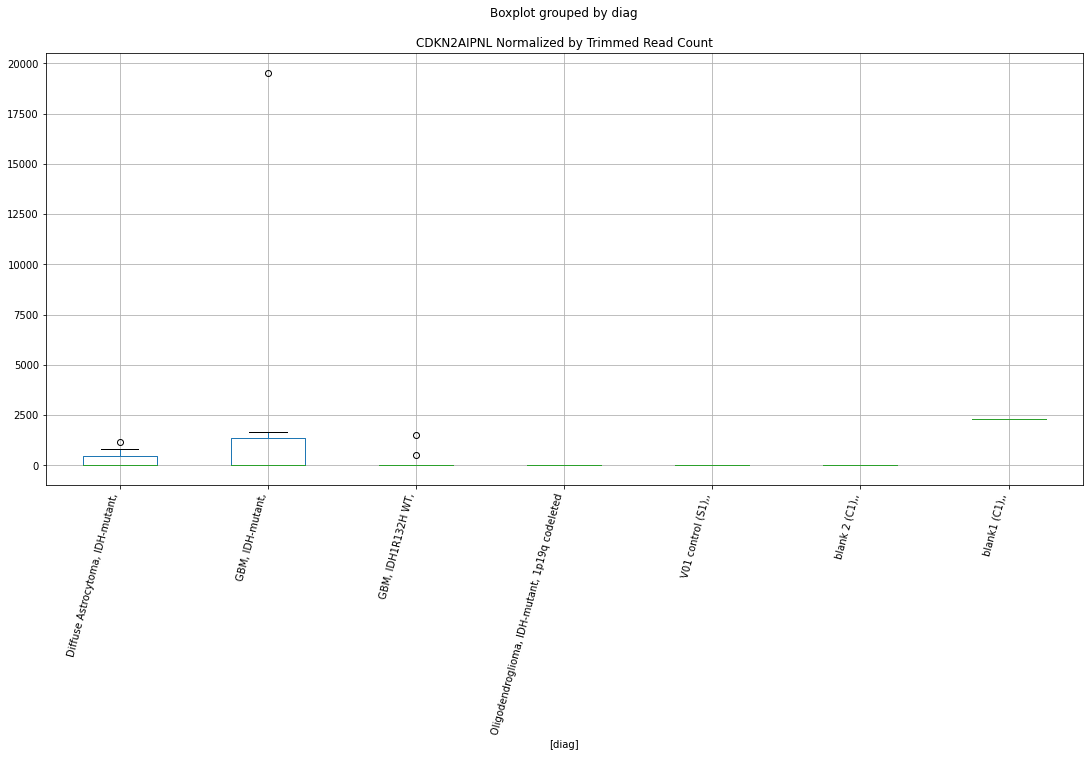

 p : 0.04536327784074556  ( t : 2.15037522407249 ) :  Lexogen  :  bbduk2  :  EGFR
Control and blanks
79     0.0
343    0.0
Name: EGFR, dtype: float64
211    0.0
Name: EGFR, dtype: float64
475    0.0
Name: EGFR, dtype: float64


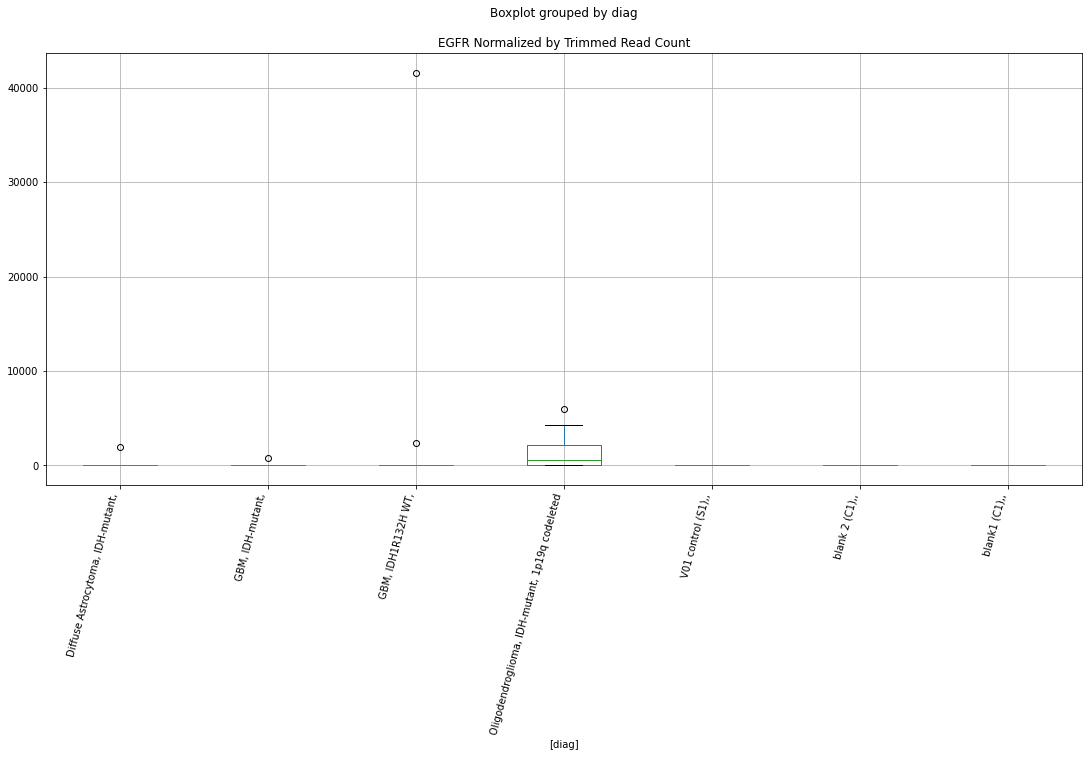

 p : 0.06726034214901823  ( t : 1.9473913018343938 ) :  D-plex  :  bbduk2  :  IDH1
Control and blanks
73     0.0
337    0.0
Name: IDH1, dtype: float64
205    179.09
Name: IDH1, dtype: float64
469    0.0
Name: IDH1, dtype: float64


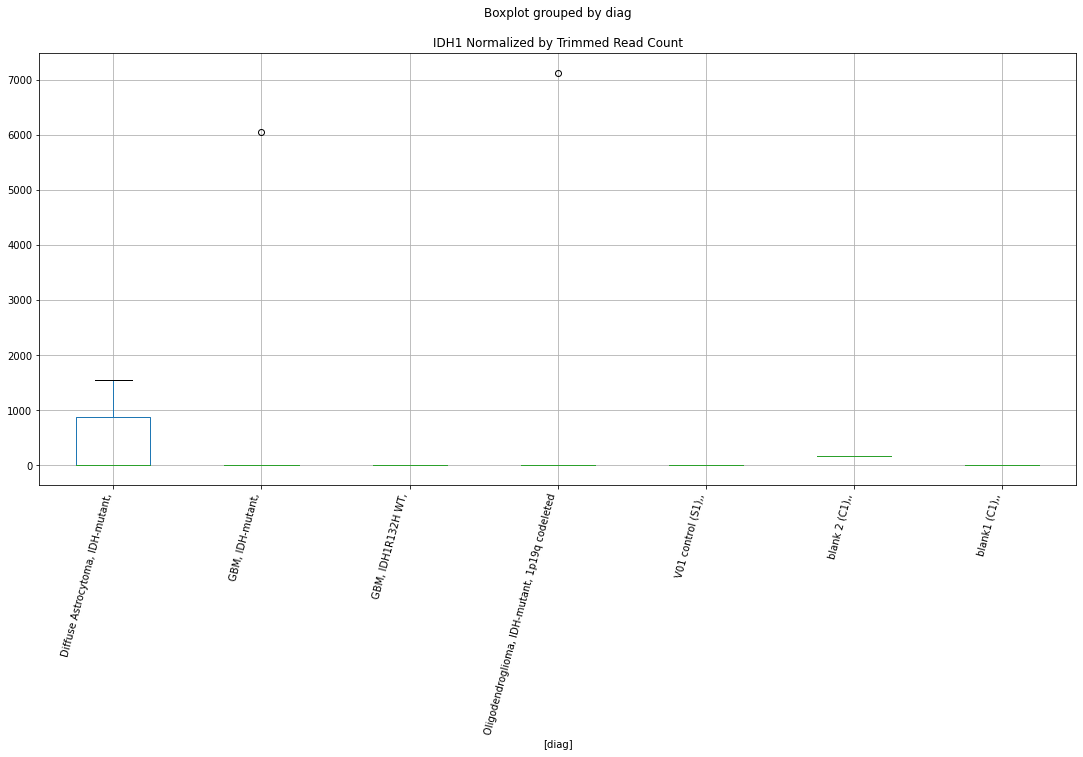

 p : 0.07098875237655615  ( t : 1.9189522234450682 ) :  Lexogen  :  bbduk2  :  EGFR
Control and blanks
79     0.0
343    0.0
Name: EGFR, dtype: float64
211    0.0
Name: EGFR, dtype: float64
475    0.0
Name: EGFR, dtype: float64


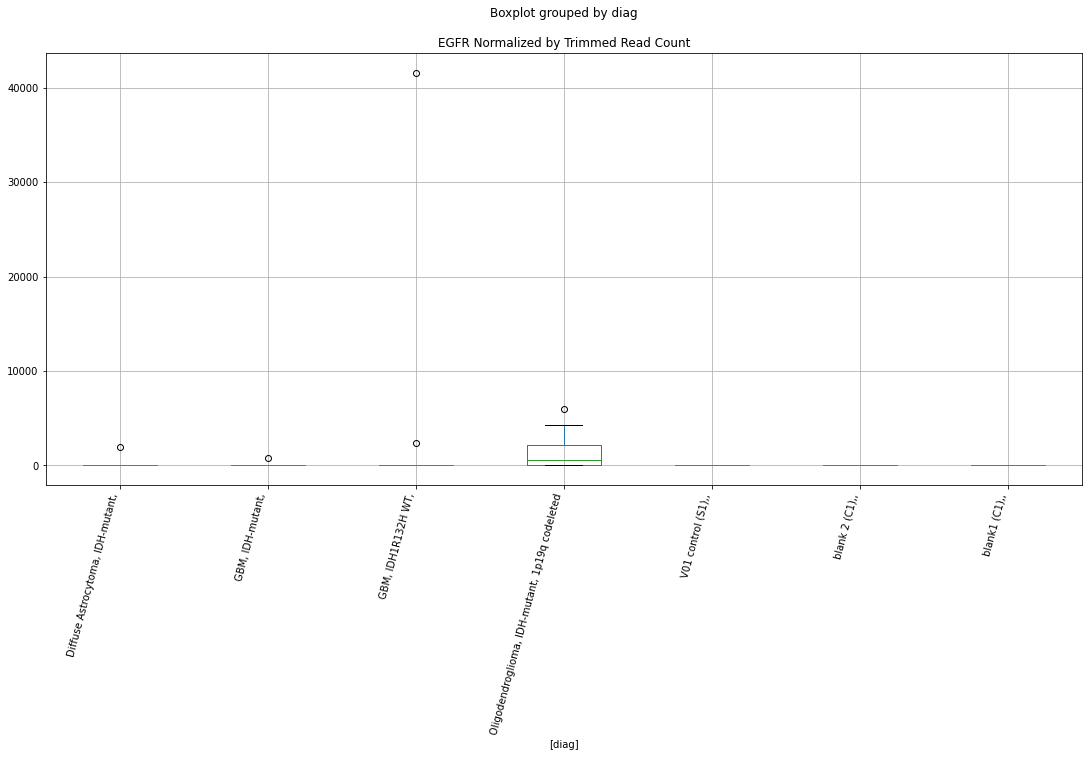

 p : 0.08168258736232811  ( t : 1.8441695860266962 ) :  Lexogen  :  cutadapt2  :  NOTCH1
Control and blanks
82         0.00
346    28198.23
Name: NOTCH1, dtype: float64
214    8679.25
Name: NOTCH1, dtype: float64
478    474.92
Name: NOTCH1, dtype: float64


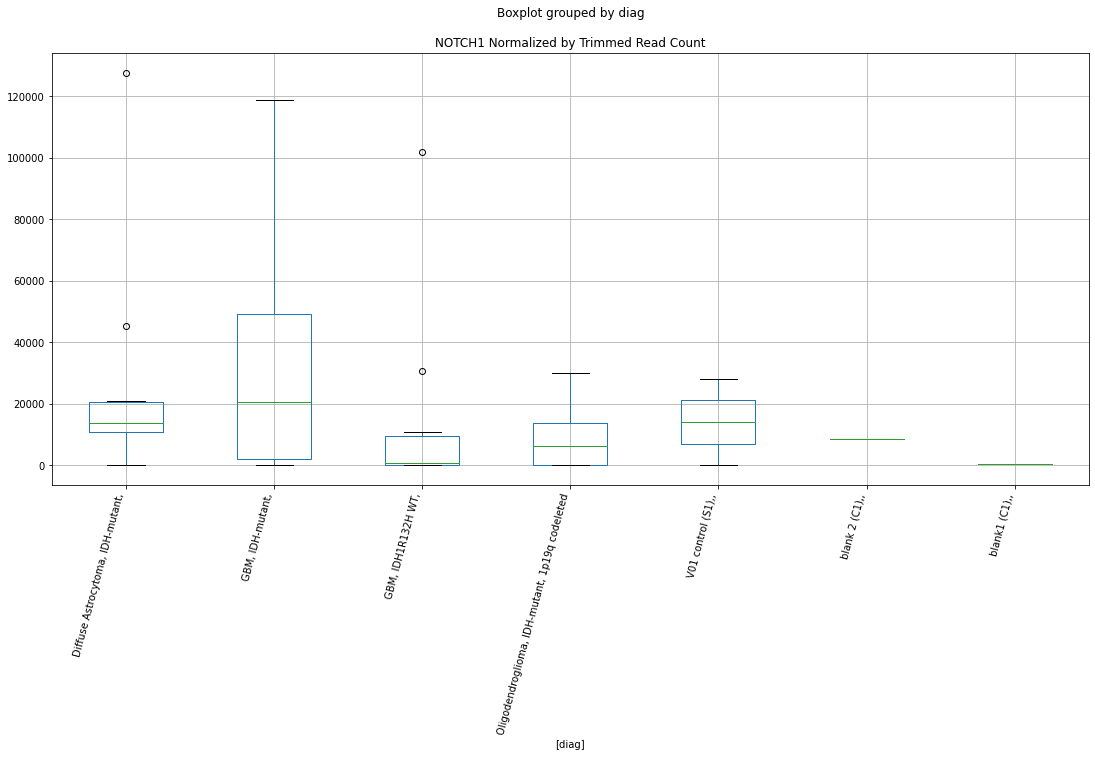

 p : 0.08399794007946997  ( t : 1.8291248879059394 ) :  D-plex  :  cutadapt2  :  RB1-DT
Control and blanks
76     0.0
340    0.0
Name: RB1-DT, dtype: float64
208    0.0
Name: RB1-DT, dtype: float64
472    577.96
Name: RB1-DT, dtype: float64


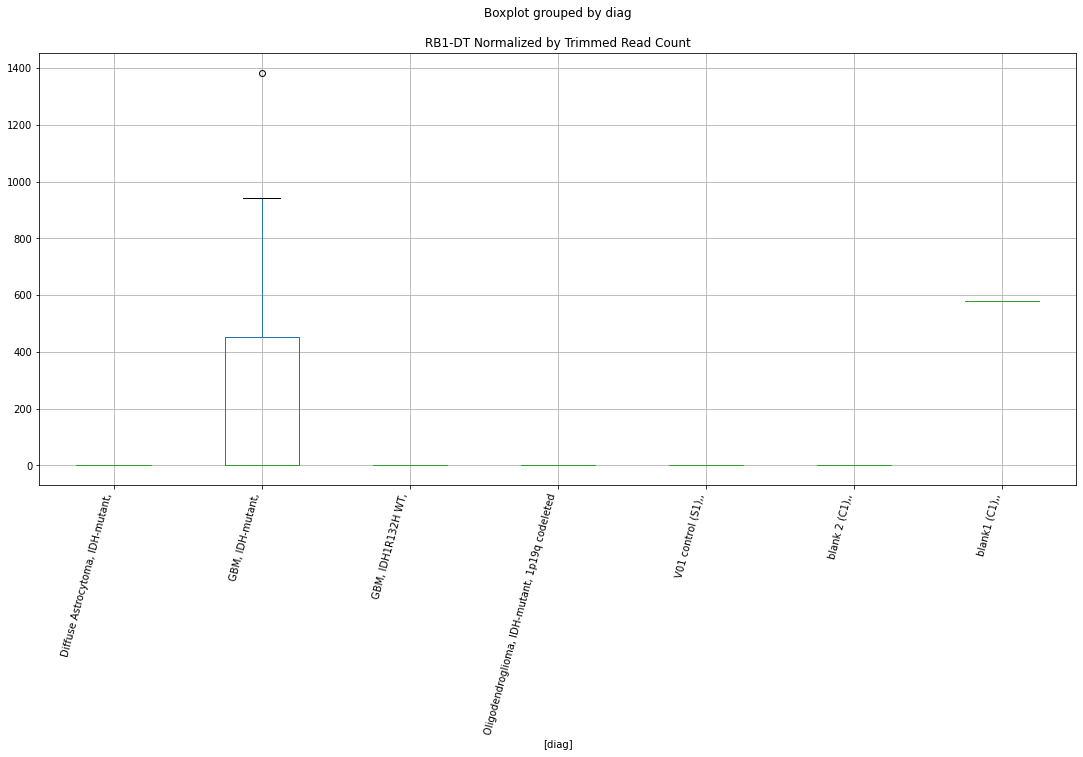

 p : 0.08716809345492967  ( t : 1.809105554324742 ) :  Lexogen  :  bbduk2  :  NOTCH1
Control and blanks
79         0.00
343    28450.12
Name: NOTCH1, dtype: float64
211    8745.8
Name: NOTCH1, dtype: float64
475    479.03
Name: NOTCH1, dtype: float64


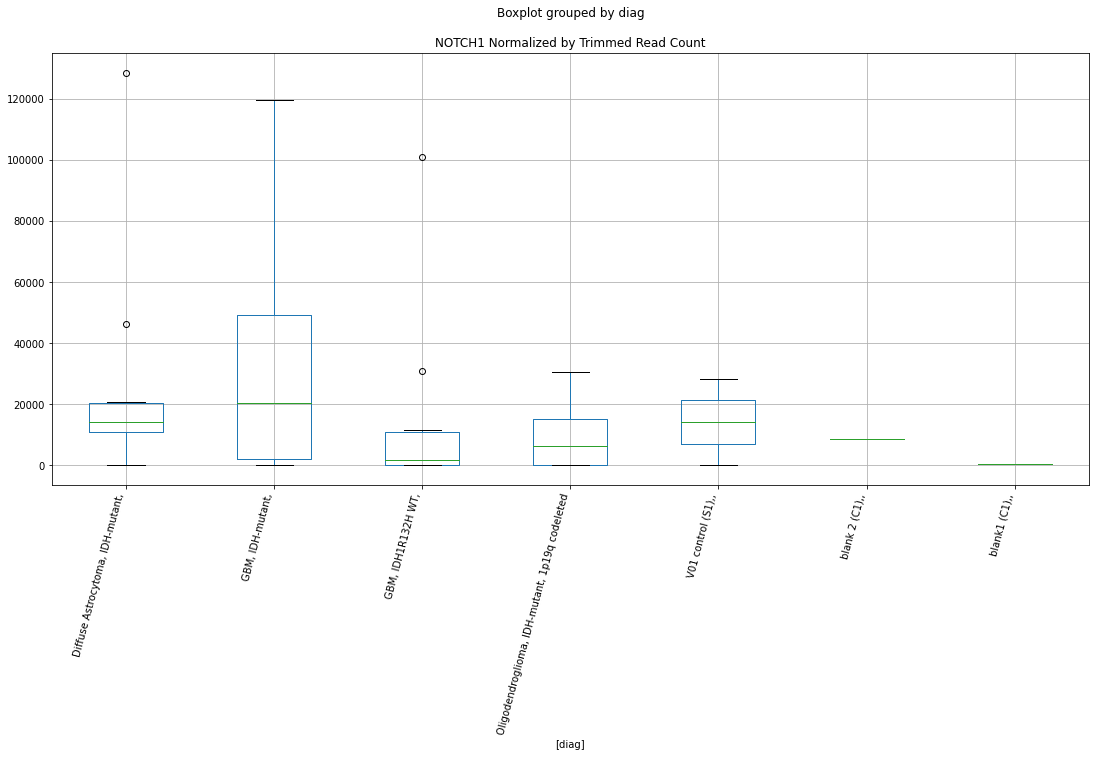

 p : 0.09008191140708462  ( t : 1.791259327015946 ) :  D-plex  :  bbduk2  :  NOTCH1
Control and blanks
73     12368.13
337    85455.10
Name: NOTCH1, dtype: float64
205    64651.83
Name: NOTCH1, dtype: float64
469    403421.63
Name: NOTCH1, dtype: float64


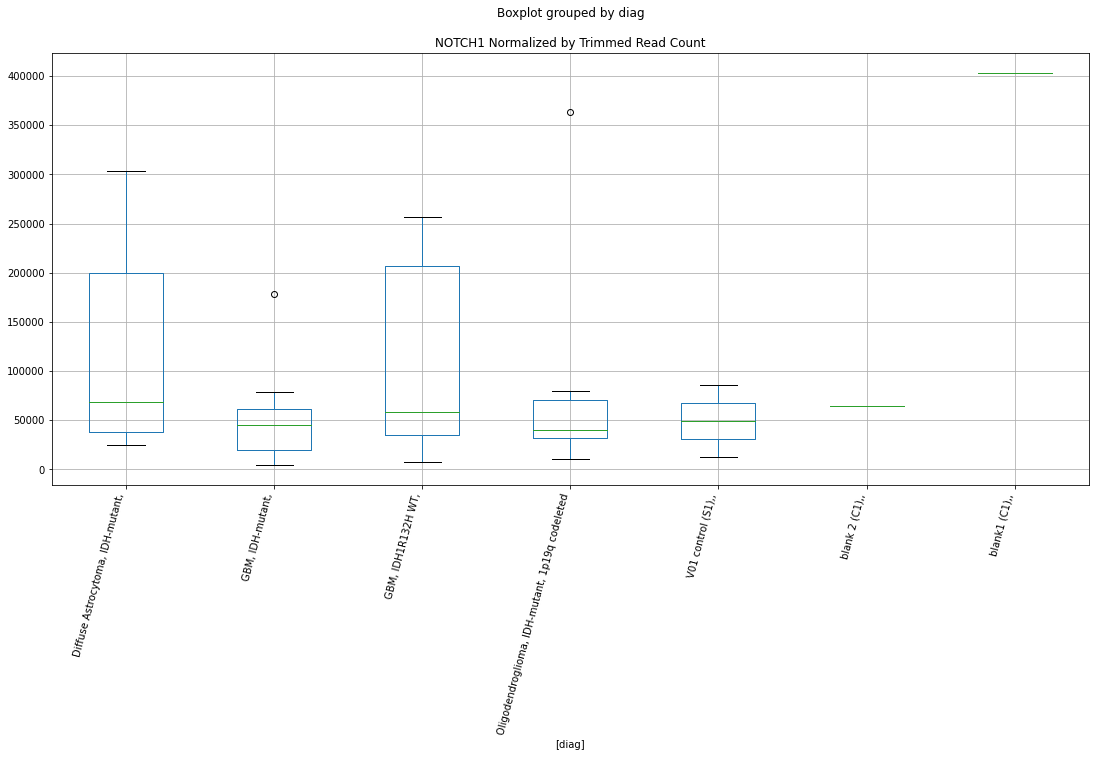

 p : 0.09338100118932555  ( t : 1.7716516052356617 ) :  D-plex  :  cutadapt2  :  NOTCH1
Control and blanks
76     12121.83
340    84550.28
Name: NOTCH1, dtype: float64
208    64371.48
Name: NOTCH1, dtype: float64
472    394165.88
Name: NOTCH1, dtype: float64


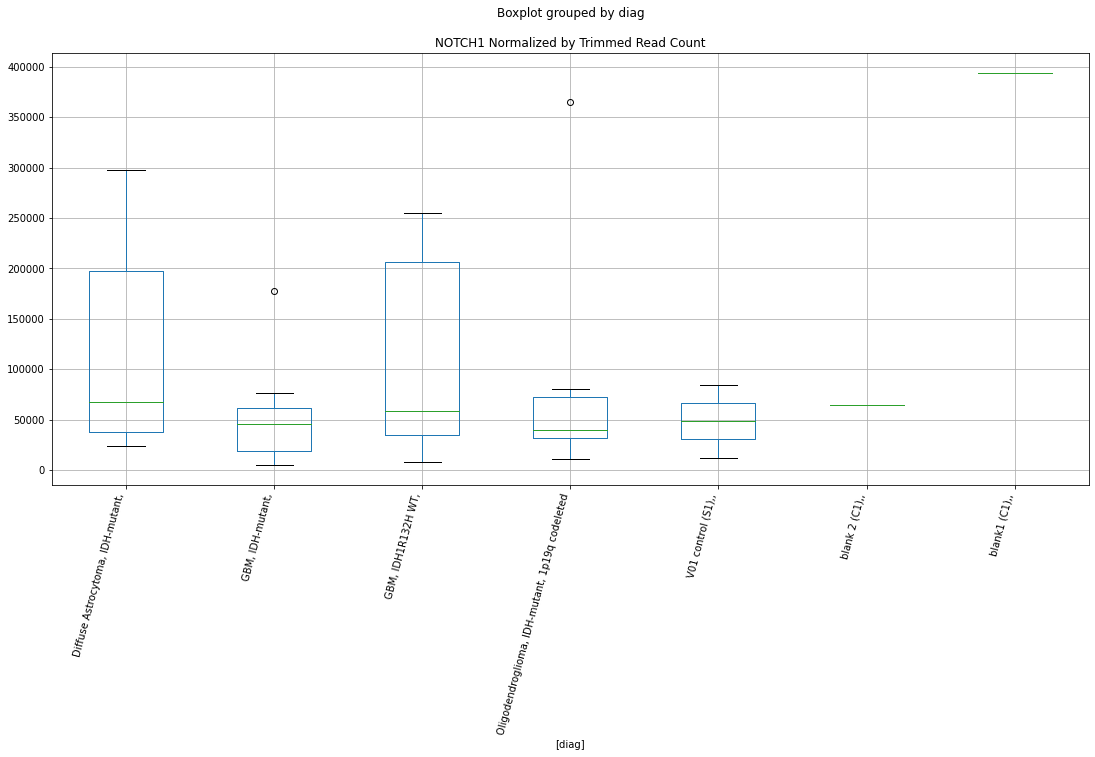

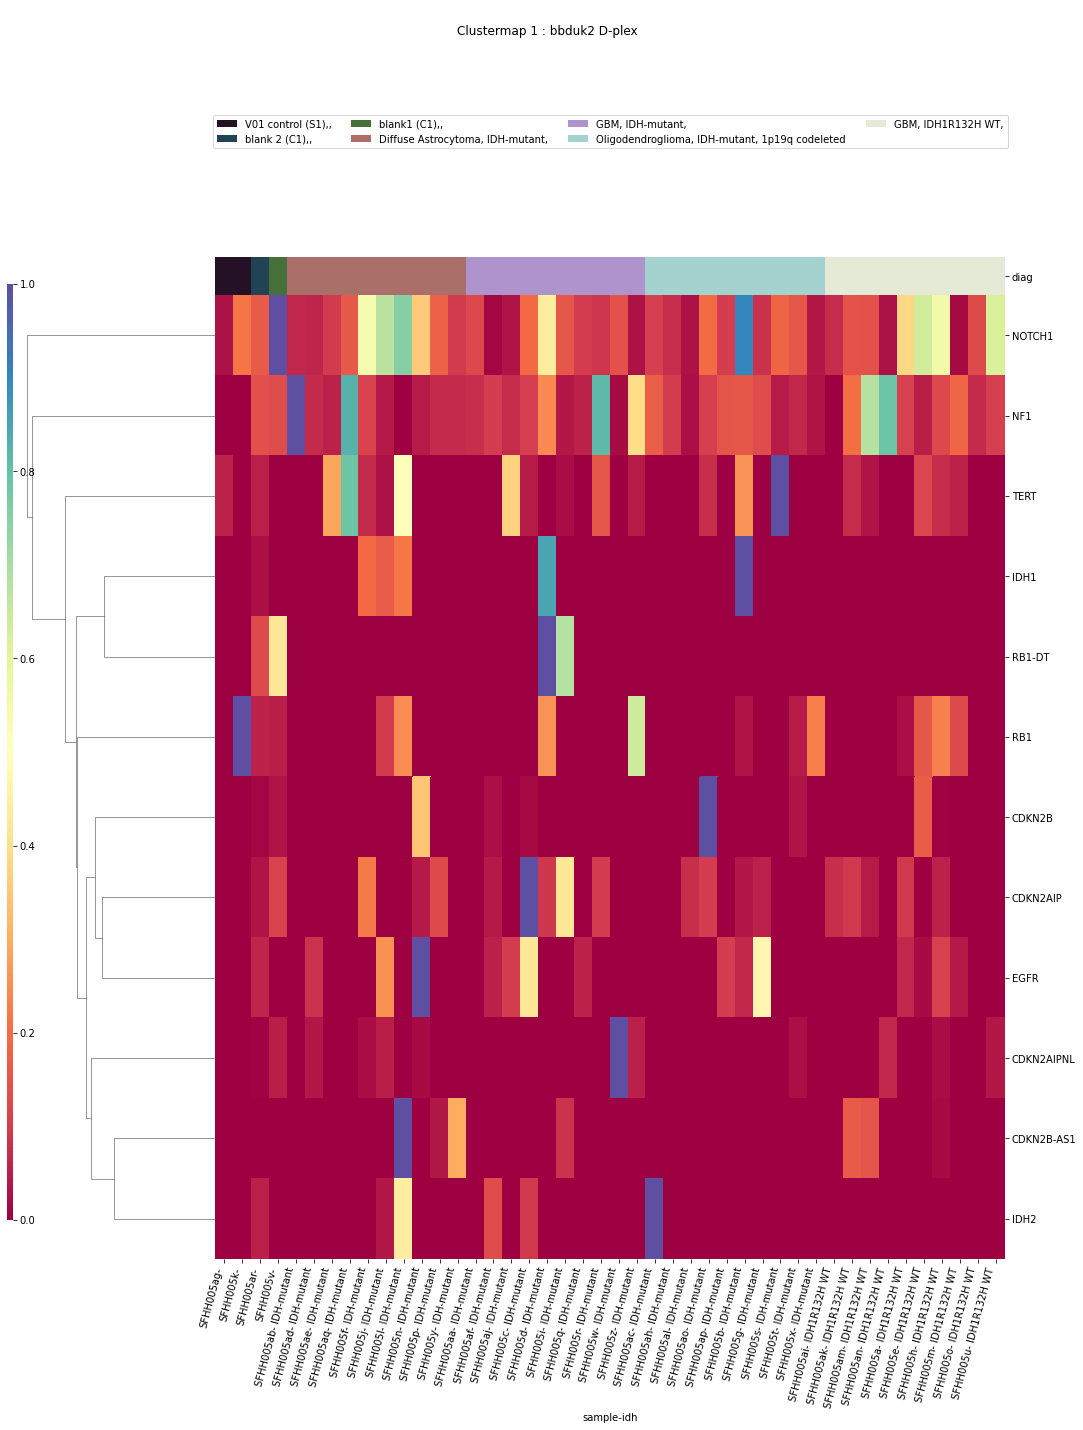

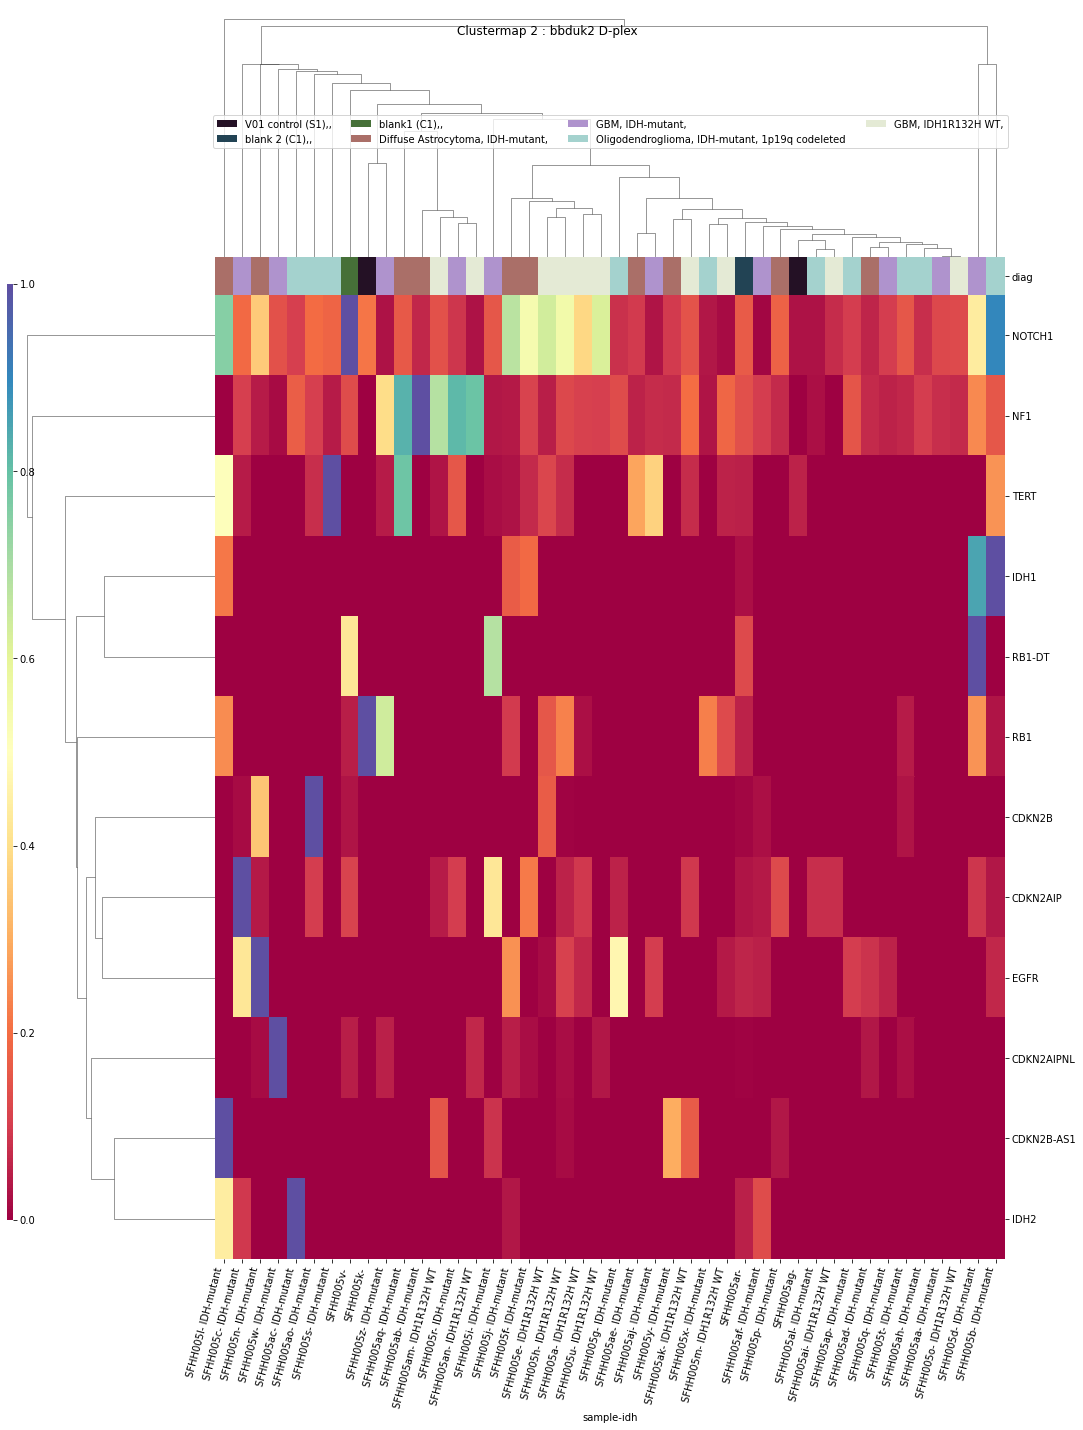

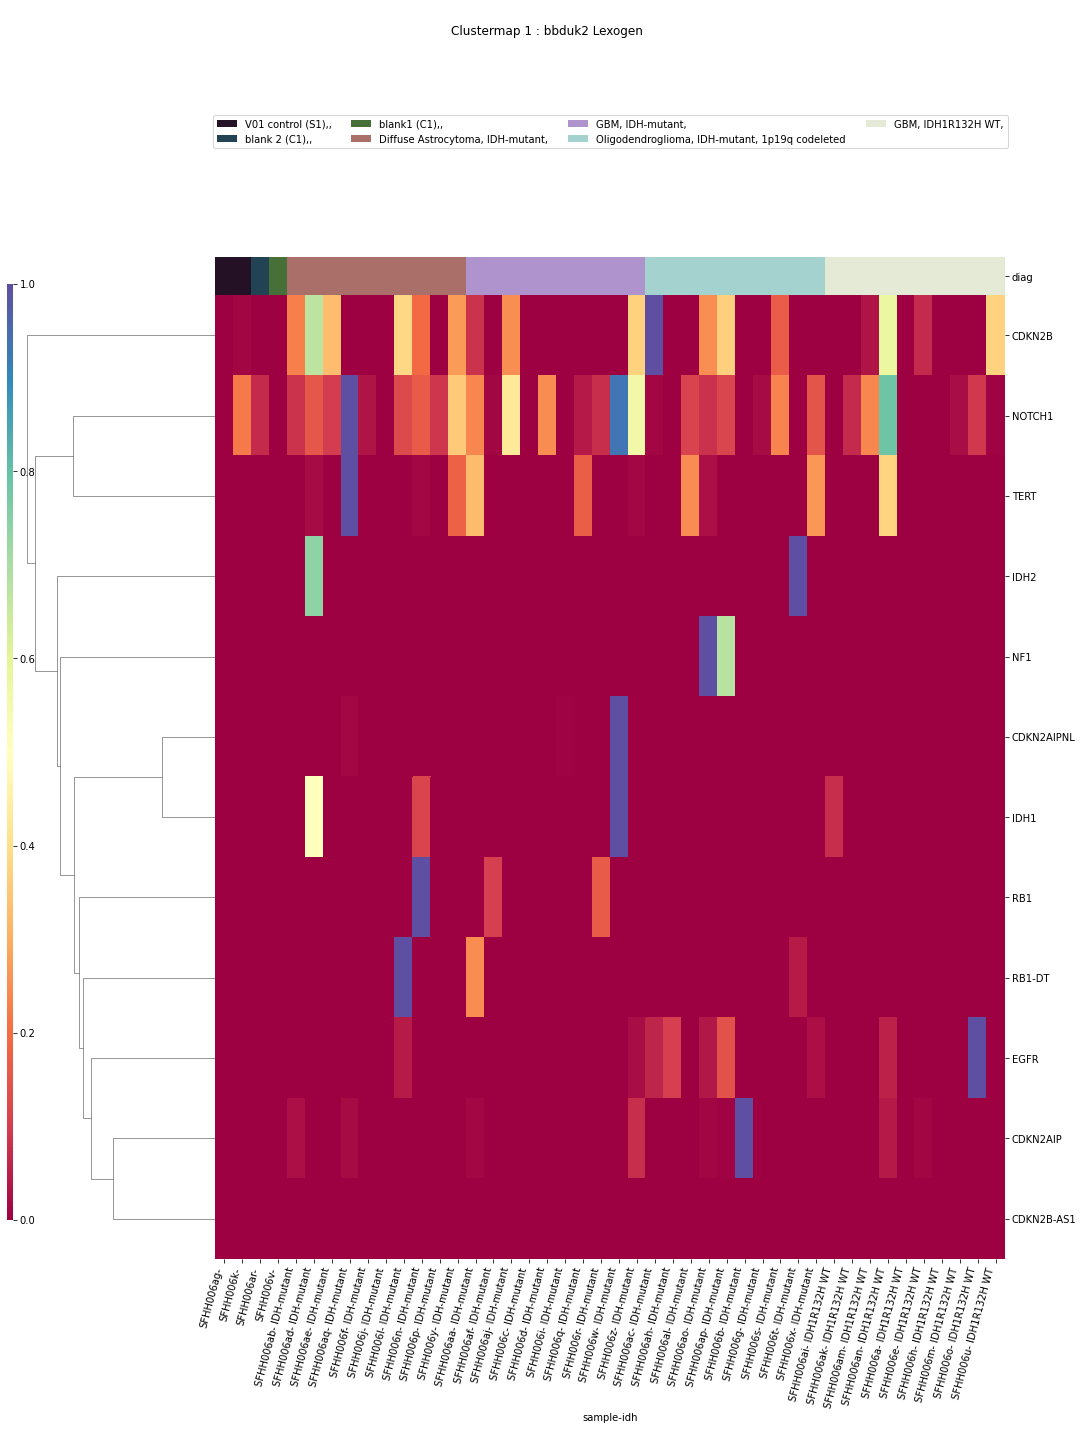

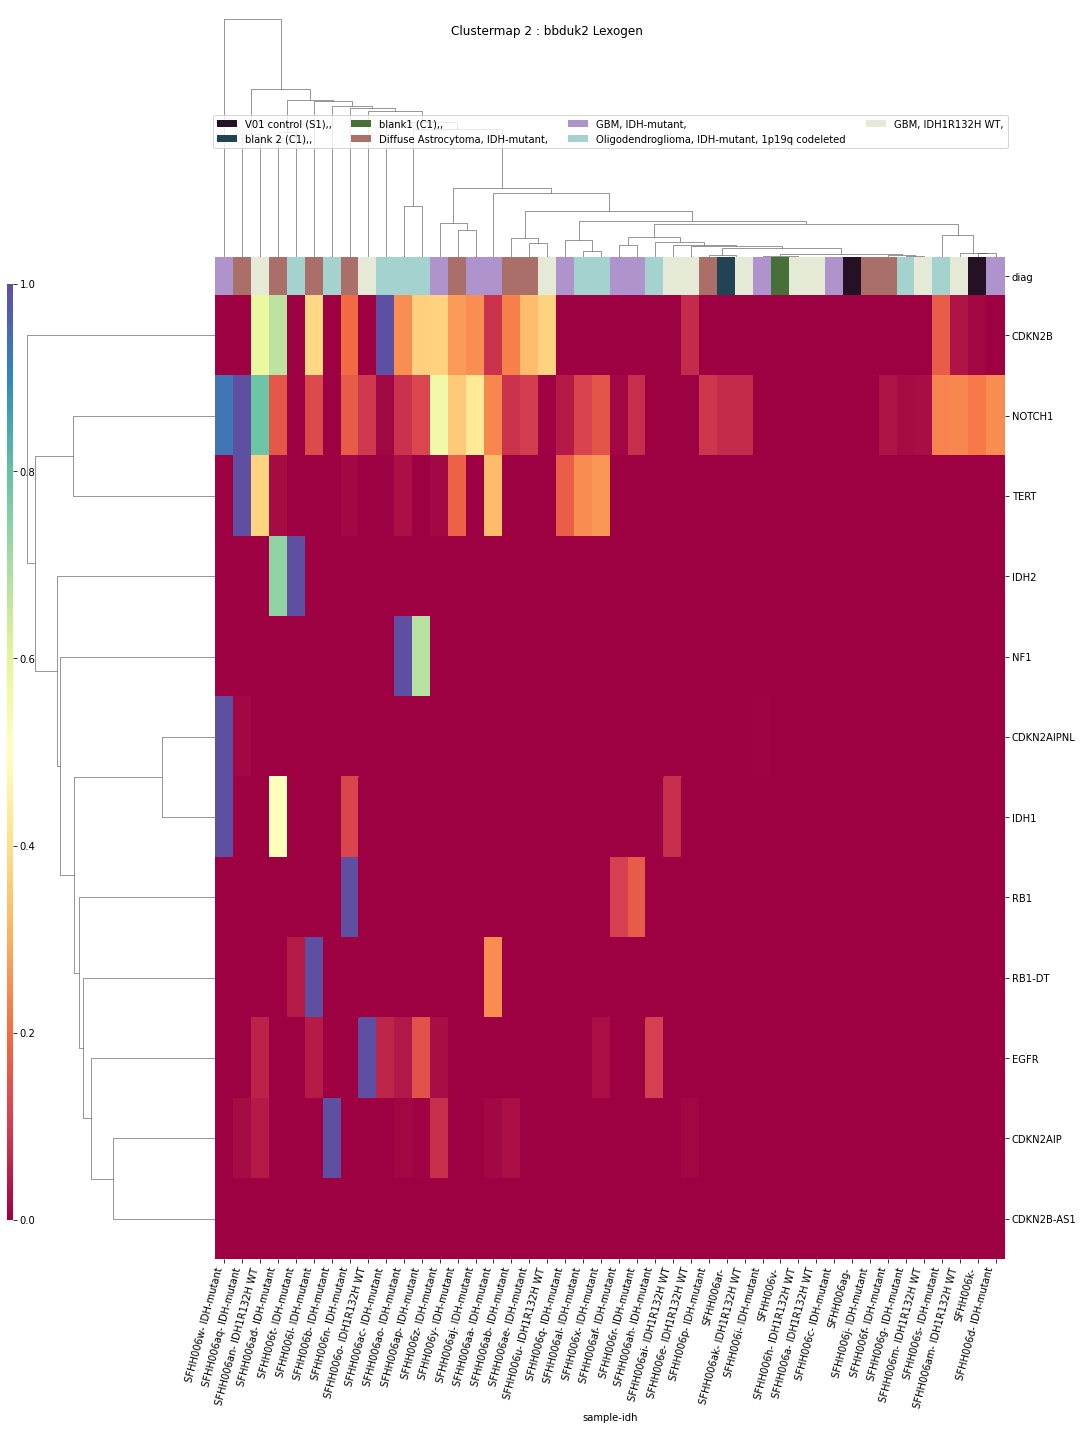

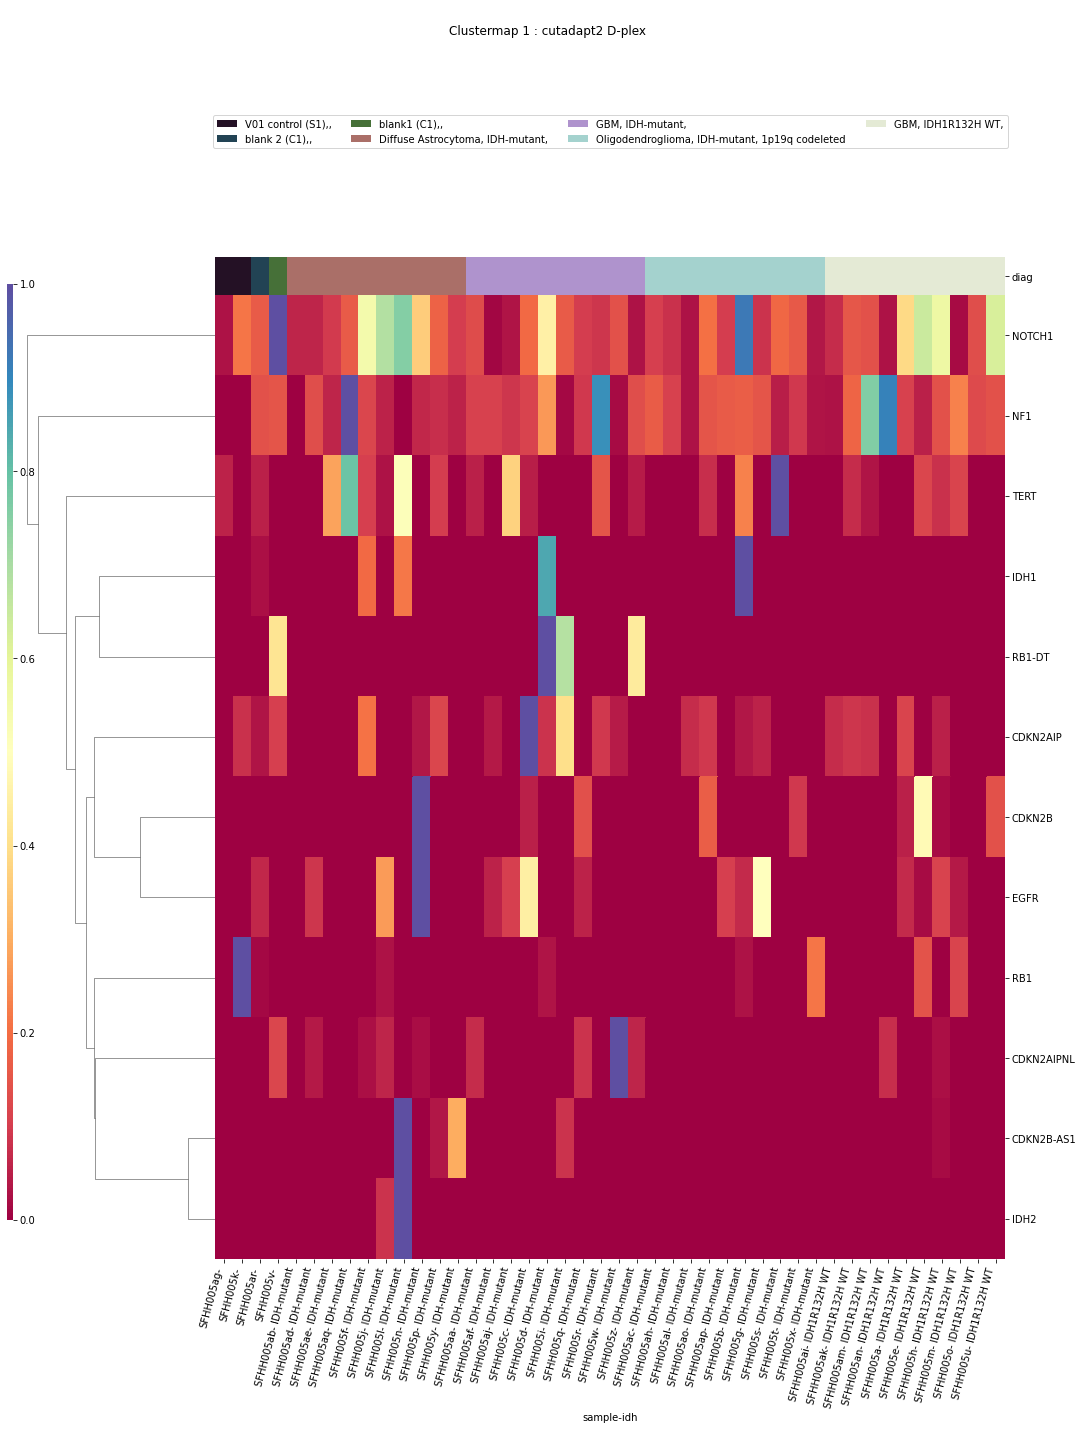

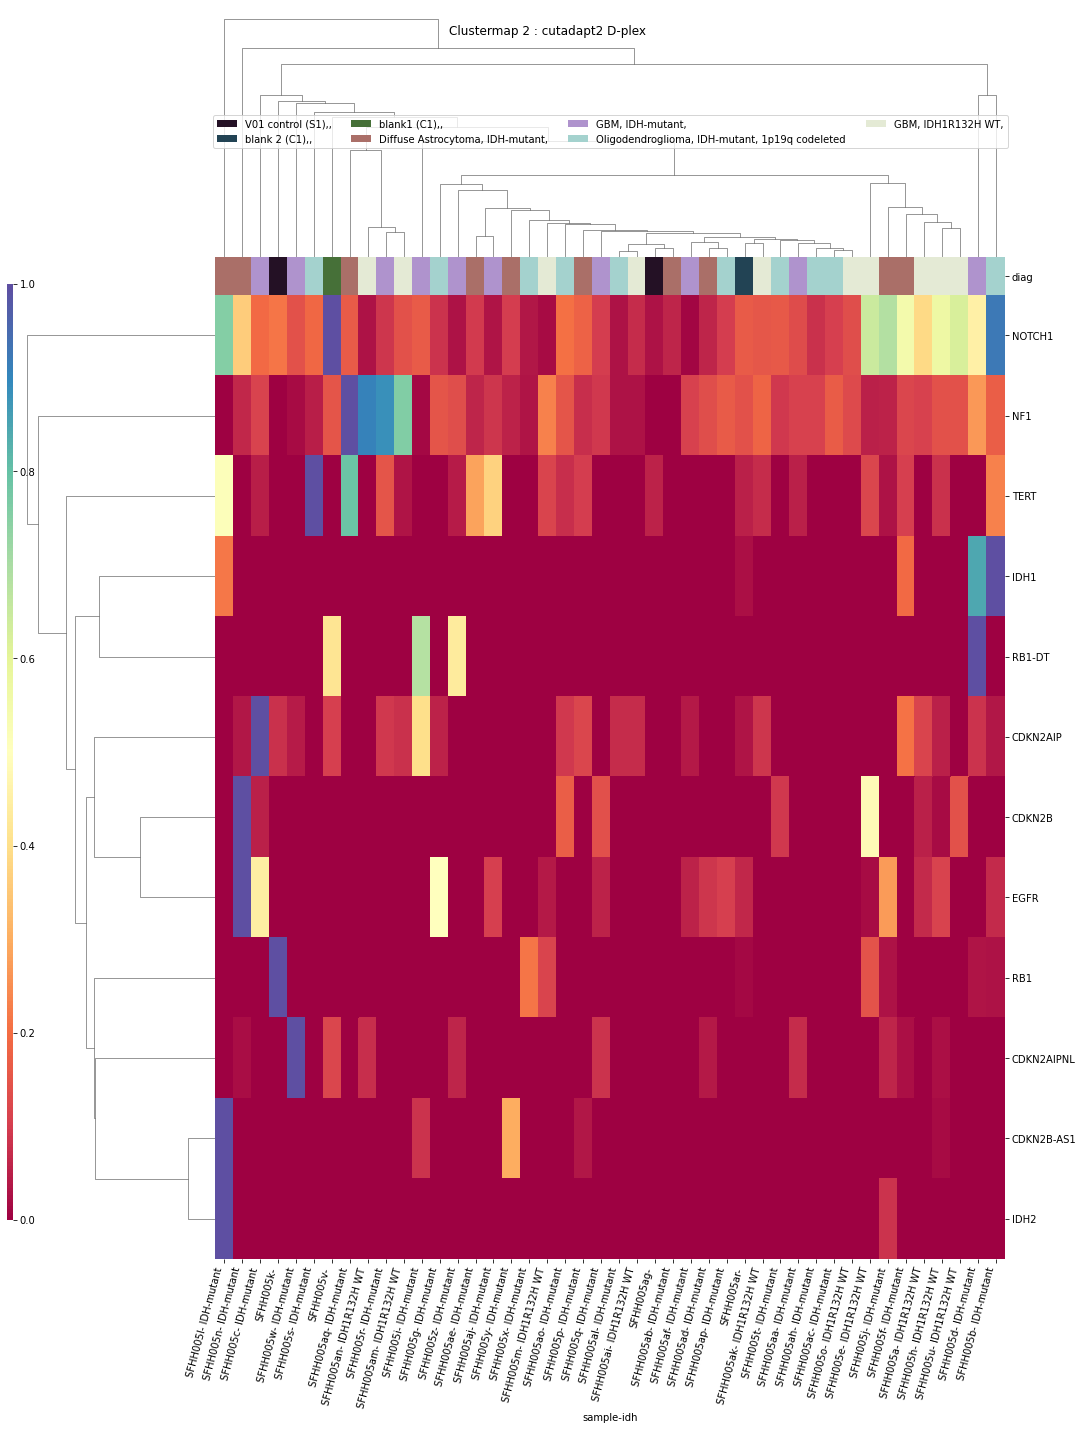

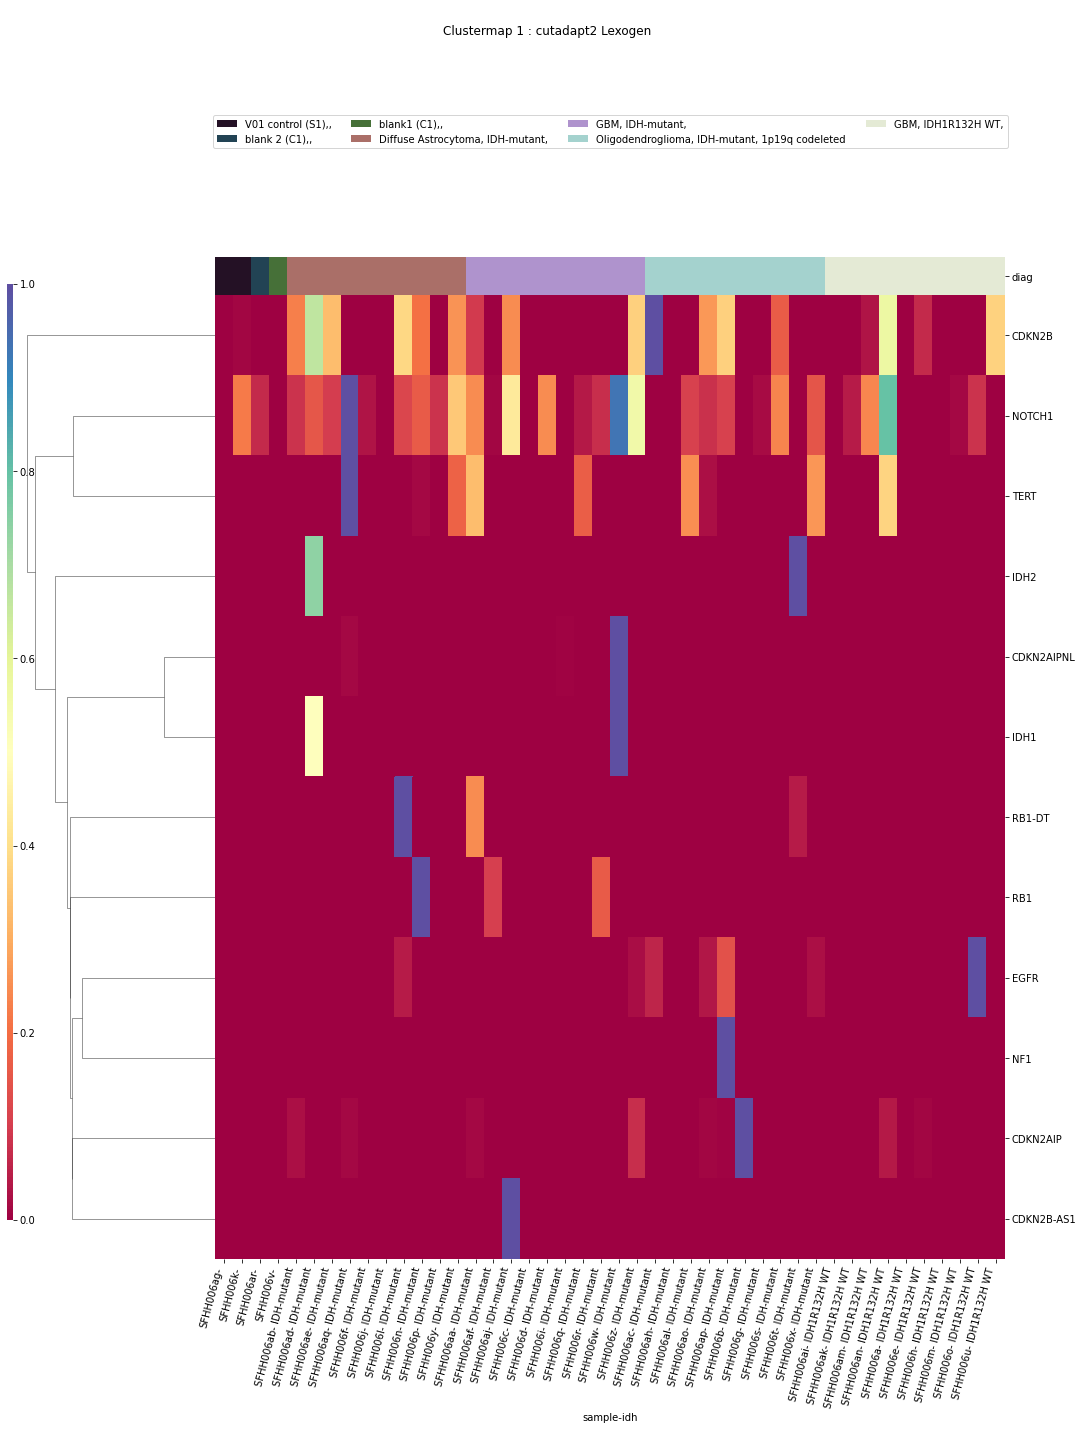

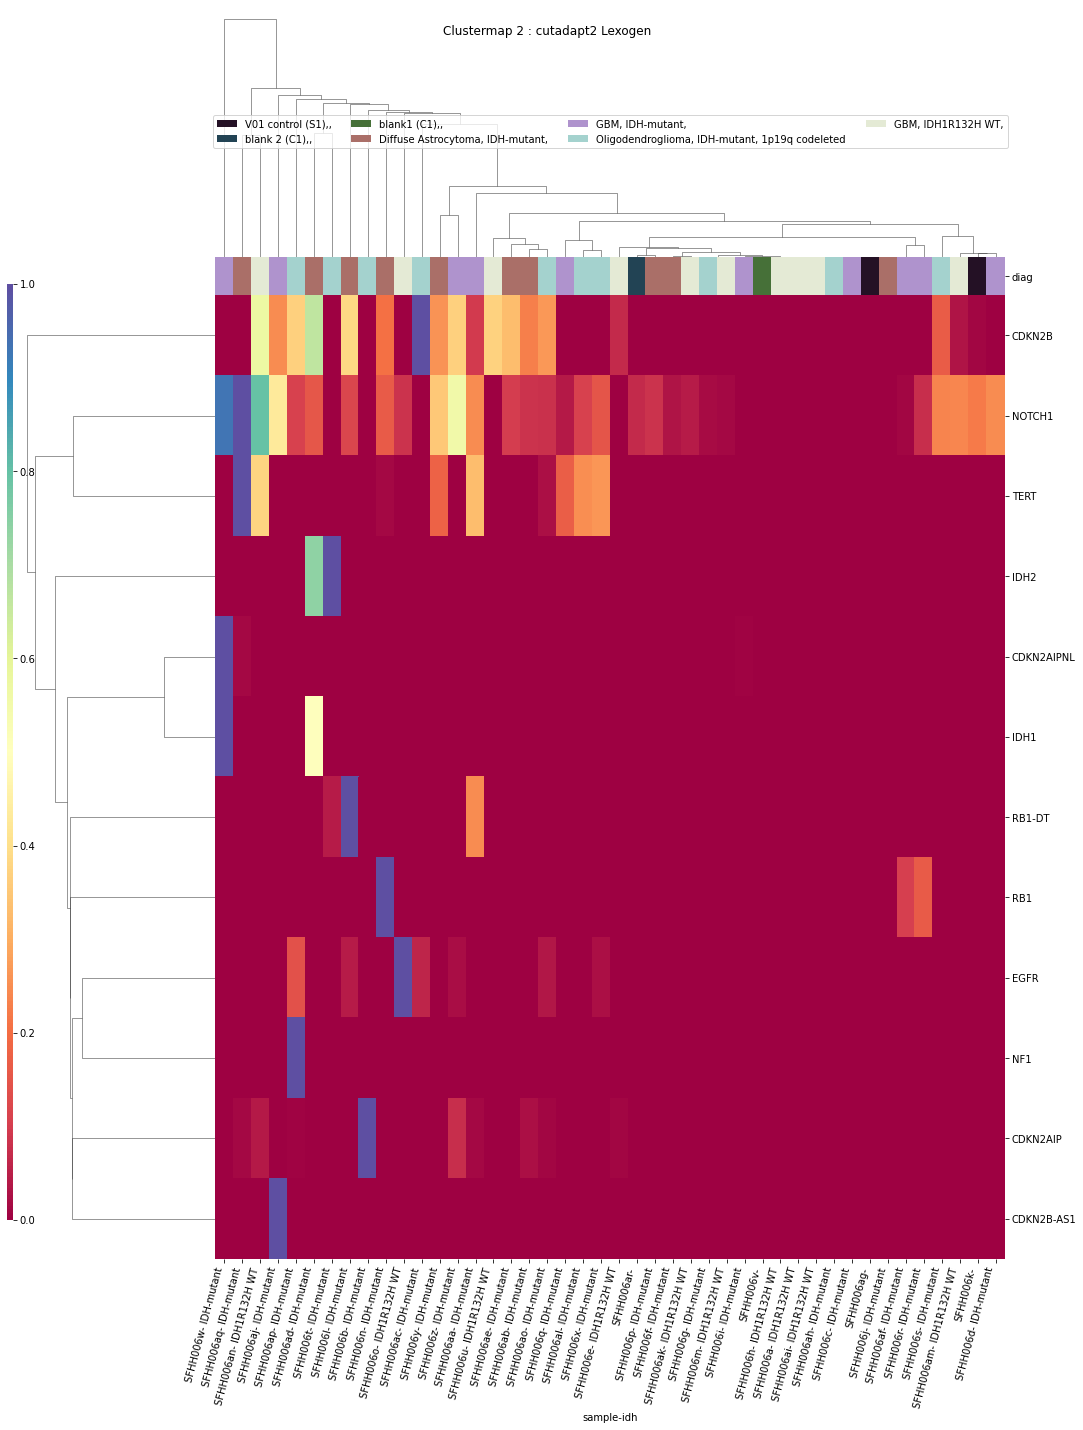

In [85]:
ttests_boxplots_and_heatmaps(dfn,['CDKN2A','CDKN2A-DT','CDKN2AIP','CDKN2AIPNL','CDKN2B','CDKN2B-AS1','EGFR',
                                  'EGFR-AS1','IDH1','IDH1-AS1','IDH2','IDH2-DT','NF1','NOTCH1','RB1','RB1CC1',
                                  'RB1-DT','TERT','TP53'],box_p=0.1,heat_p=0.2)

In [86]:
datetime.now().strftime("%H:%M:%S")

'08:46:05'

# Genes

In [87]:
ttests_boxplots_and_heatmaps(dfn,genes)

KeyboardInterrupt: 

In [ ]:
datetime.now().strftime("%H:%M:%S")

# miRNA

ttests_boxplots_and_heatmaps(dfn,mirnas)

In [ ]:
datetime.now().strftime("%H:%M:%S")

# mRNA_Prot

ttests_boxplots_and_heatmaps(dfn,mrnas)

In [ ]:
datetime.now().strftime("%H:%M:%S")

# Diamond NR Families

In [ ]:
#ttests_boxplots_and_heatmaps(dfn,diamond_families)

In [ ]:
datetime.now().strftime("%H:%M:%S")

# RMSK Classes

ttests_boxplots_and_heatmaps(dfn,rmsk_classes)

In [ ]:
datetime.now().strftime("%H:%M:%S")

# RMSK Families

ttests_boxplots_and_heatmaps(dfn,rmsk_families)

In [ ]:
datetime.now().strftime("%H:%M:%S")

# RMSK Names

ttests_boxplots_and_heatmaps(dfn,rmsk_names)

In [ ]:
datetime.now().strftime("%H:%M:%S")

In [ ]:
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [ ]:
pd.set_option('display.max_columns', default_max_columns)

In [ ]:
pd.set_option('display.max_rows',default_max_rows)

In [ ]:
pd.set_option('display.precision', default_precision)